In [56]:
import pandas as pd
import numpy as np
pd.set_option("max_columns",None)

import sys
import warnings

if not sys.warnoptions:
    
    warnings.simplefilter("ignore")

In [57]:
Raw_Data=pd.read_csv("Engineering_graduate_salary.csv")
Raw_Data.head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,22-10-1990,87.80,cbse,2009,84.00,cbse,6920,1,B.Tech/B.E.,instrumentation and control engineering,73.82,6920,1,Delhi,2013,650,665,810,0.694479,485,366,-1,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,15-05-1990,57.00,cbse,2010,64.50,cbse,6624,2,B.Tech/B.E.,computer science & engineering,65.00,6624,0,Uttar Pradesh,2014,440,435,210,0.342315,365,-1,-1,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,21-08-1989,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,B.Tech/B.E.,electronics & telecommunications,61.94,9084,0,Maharashtra,2011,485,475,505,0.824666,-1,400,-1,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,04-05-1991,84.30,cbse,2009,86.00,cbse,8195,1,B.Tech/B.E.,computer science & engineering,80.40,8195,1,Delhi,2013,675,620,635,0.990009,655,-1,-1,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,30-10-1990,82.00,cbse,2008,75.00,cbse,4889,2,B.Tech/B.E.,biotechnology,64.30,4889,1,Tamil Nadu,2012,575,495,365,0.278457,315,-1,-1,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


**From above observation we can note that few columns ["Domain", "ComputerProgramming", "ElectronicsAndSemicon", "ComputerScience", "MechanicalEngg", "ElectricalEngg", "TelecomEngg", "CivilEngg"]
have value as "-1" in them which can be handled and imputed as null values**

In [58]:
Raw_Data.shape #2998 rows, 34 Columns

(2998, 34)

In [59]:
Raw_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2998 non-null   int64  
 1   Gender                 2998 non-null   object 
 2   DOB                    2998 non-null   object 
 3   10percentage           2998 non-null   float64
 4   10board                2998 non-null   object 
 5   12graduation           2998 non-null   int64  
 6   12percentage           2998 non-null   float64
 7   12board                2998 non-null   object 
 8   CollegeID              2998 non-null   int64  
 9   CollegeTier            2998 non-null   int64  
 10  Degree                 2998 non-null   object 
 11  Specialization         2998 non-null   object 
 12  collegeGPA             2998 non-null   float64
 13  CollegeCityID          2998 non-null   int64  
 14  CollegeCityTier        2998 non-null   int64  
 15  Coll

**Checking the Total unique values and corresponding Data types of each Column in the Dataframe**

In [60]:
a=[]
for i in Raw_Data:
    b=Raw_Data[i].nunique()
    a.append(b)

In [61]:
unique=pd.DataFrame(index=Raw_Data.columns,data=a,columns=["Total no of unique values"])
dtype=pd.DataFrame(data=Raw_Data.dtypes, columns=["Data type"])
mg=pd.merge(unique, dtype, on=Raw_Data.columns, how='outer')
mg.rename(columns={"key_0":"Column_Names"},inplace=True)
mg.set_index("Column_Names")

,Total no of unique values,Data type
Column_Names,,
ID,2998,int64
Gender,2,object
DOB,1633,object
10percentage,736,float64
10board,221,object
12graduation,13,int64
12percentage,717,float64
12board,277,object
CollegeID,1173,int64


**Dropping the features that do not provide any information in predicting the Salary**

In [62]:
Raw_Data.drop(["ID", "10board", "12graduation", "12board", "CollegeID", "CollegeTier", "CollegeCityID", "CollegeCityTier"],axis=1,inplace=True)

In [63]:
Raw_Data.shape

(2998, 26)

**Converting the datatype of "DOB" column from Object to datetime**

In [64]:
Raw_Data["DOB"]=pd.to_datetime(Raw_Data["DOB"]) 
Raw_Data["DOB"].dtypes 


dtype('<M8[ns]')

**Converting the DOB as an Age column**

In [65]:
import datetime as dt
cur_yr = dt.datetime.now().year #returns the current year
cur_yr

2021

In [66]:
Raw_Data["Age"]=cur_yr - pd.DatetimeIndex(Raw_Data['DOB']).year # extracting only the year from the "DOB" & Subtracting with cur_yr "2021"
Raw_Data.drop("DOB", axis = 1, inplace = True) #dropping the actual DOB column from the Dataframe
Raw_Data.head(3)

,Gender,10percentage,12percentage,Degree,Specialization,collegeGPA,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary,Age
0,f,87.80,84.00,B.Tech/B.E.,instrumentation and control engineering,73.82,Delhi,2013,650,665,810,0.694479,485,366,-1,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.1459,0.2889,445000,31
1,m,57.00,64.50,B.Tech/B.E.,computer science & engineering,65.00,Uttar Pradesh,2014,440,435,210,0.342315,365,-1,-1,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.5262,-0.2859,110000,31
2,m,77.33,85.17,B.Tech/B.E.,electronics & telecommunications,61.94,Maharashtra,2011,485,475,505,0.824666,-1,400,-1,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.2902,-0.2875,255000,32


In [67]:
a=Raw_Data.pop("Age") 

In [68]:
Raw_Data.columns #Age is removed from the the dataframe 

Index(['Gender', '10percentage', '12percentage', 'Degree', 'Specialization',
       'collegeGPA', 'CollegeState', 'GraduationYear', 'English', 'Logical',
       'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Salary'],
      dtype='object')

In [69]:
# shifting the "Age" column back to the original position of "DOB" in the Dataframe

Raw_Data.insert(2,"Age",a)
Raw_Data.head(2)

,Gender,10percentage,Age,12percentage,Degree,Specialization,collegeGPA,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,87.8,31,84.0,B.Tech/B.E.,instrumentation and control engineering,73.82,Delhi,2013,650,665,810,0.694479,485,366,-1,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.1459,0.2889,445000
1,m,57.0,31,64.5,B.Tech/B.E.,computer science & engineering,65.00,Uttar Pradesh,2014,440,435,210,0.342315,365,-1,-1,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.5262,-0.2859,110000


In [70]:
Raw_Data["Age"].dtype #checking the datatype of the Age 

dtype('int64')

### Missing values checks

In [71]:
Raw_Data.isna().sum() #No missing values in any of the columns 

Gender                   0
10percentage             0
Age                      0
12percentage             0
Degree                   0
Specialization           0
collegeGPA               0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
Salary                   0
dtype: int64

##### From the above missing value analysis done during describe method, Replacing "-1" with "np.nan" 

In [72]:
Raw_Data.replace(-1,np.NaN,inplace=True)

In [73]:
Raw_Data.isna().sum()

Gender                      0
10percentage                0
Age                         0
12percentage                0
Degree                      0
Specialization              0
collegeGPA                  0
CollegeState                0
GraduationYear              0
English                     0
Logical                     0
Quant                       0
Domain                    179
ComputerProgramming       650
ElectronicsAndSemicon    2133
ComputerScience          2298
MechanicalEngg           2811
ElectricalEngg           2876
TelecomEngg              2724
CivilEngg                2972
conscientiousness           0
agreeableness               0
extraversion                0
nueroticism                 0
openess_to_experience       0
Salary                      0
dtype: int64

### Missing values imputation using KNN imputer

In [74]:
nan_colnames=pd.Series([col for col in Raw_Data.columns if Raw_Data[col].isnull().any()])
a=[]

for i in nan_colnames:
        
    percent = (Raw_Data[i].isna().sum()*100/Raw_Data[i].isna().count())
    a.append(percent)
a

missing_values = pd.concat([nan_colnames,pd.Series(a)],axis=1,keys = ["Col_Names","percentage"])
missing_values

,Col_Names,percentage
0,Domain,5.970647
1,ComputerProgramming,21.681121
2,ElectronicsAndSemicon,71.147432
3,ComputerScience,76.651101
4,MechanicalEngg,93.762508
5,ElectricalEngg,95.930620
6,TelecomEngg,90.860574
7,CivilEngg,99.132755


**KNN imputer works only when the column is numerical, for categorical variables having missing values need to perform dummy first then scale and then impute**

In [75]:
cont = Raw_Data.columns[Raw_Data.dtypes != object]
cont

Index(['10percentage', 'Age', '12percentage', 'collegeGPA', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'Salary'],
      dtype='object')

In [76]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
knn = pd.DataFrame(imputer.fit_transform(Raw_Data[cont]),columns = cont)
knn.head()

,10percentage,Age,12percentage,collegeGPA,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,87.80,31.0,84.00,73.82,2013.0,650.0,665.0,810.0,0.694479,485.0,366.0,450.4,478.6,494.4,329.2,334.4,-0.1590,0.3789,1.2396,0.14590,0.2889,445000.0
1,57.00,31.0,64.50,65.00,2014.0,440.0,435.0,210.0,0.342315,365.0,297.6,309.0,351.2,280.0,323.6,286.0,1.1336,0.0459,1.2396,0.52620,-0.2859,110000.0
2,77.33,32.0,85.17,61.94,2011.0,485.0,475.0,505.0,0.824666,355.0,400.0,401.0,414.0,510.6,260.0,352.0,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000.0
3,84.30,30.0,86.00,80.40,2013.0,675.0,620.0,635.0,0.990009,655.0,372.8,450.4,456.8,473.2,329.0,334.4,-0.4463,0.2124,0.3174,0.27270,0.4805,420000.0
4,82.00,31.0,75.00,64.30,2012.0,575.0,495.0,365.0,0.278457,315.0,397.6,388.6,363.0,359.2,422.0,320.6,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000.0


In [77]:
Raw_Data.shape 

(2998, 26)

In [78]:
# Dropping the columns from the Dataframe to be replaced with the imputed columns

Raw_Data.drop(['10percentage', 'Age', '12percentage', 'collegeGPA', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'Salary'],axis=1,inplace=True)

In [79]:
print(Raw_Data.shape)
print(Raw_Data.columns) 

(2998, 4)
Index(['Gender', 'Degree', 'Specialization', 'CollegeState'], dtype='object')


In [80]:
Raw_Data.head(2) #Dataframe containing only the categorical features after dropping all the numerical features

,Gender,Degree,Specialization,CollegeState
0,f,B.Tech/B.E.,instrumentation and control engineering,Delhi
1,m,B.Tech/B.E.,computer science & engineering,Uttar Pradesh


In [81]:
 # Combining the Imputed columns done for missing values back to the actual Raw_Data

Raw_Data=pd.concat([Raw_Data,knn],axis=1)

In [82]:
Raw_Data.shape

(2998, 26)

### Handling the Columns/Features having too many categories in the Dataset

In [83]:
b=[]
for i in Raw_Data.select_dtypes(include=["object"]).columns:
    a=Raw_Data[i].nunique()
    b.append(a)
    
pd.DataFrame(b,Raw_Data.select_dtypes(include=["object"]).columns,columns=["Total Categories"])

,Total Categories
Gender,2
Degree,4
Specialization,42
CollegeState,26


**from above we can see that "Specialization" & "CollegeState" have High Cardinality**

### Combining categories for the column "specialization

In [84]:
pd.set_option("max_rows",500)
Raw_Data["Specialization"].value_counts()

electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         155
electronics and electrical engineering         148
electronics & telecommunications                89
electrical engineering                          63
electronics & instrumentation eng               24
information science engineering                 18
instrumentation and control engineering         18
electronics and instrumentation engineering     18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
other                                           10
industrial & production engineering              8
chemical engineering                             7
applied electronics and instrum

In [85]:
Electronics_and_Instrumentation_Engineering = {
    "electronics & instrumentation eng" : "Electronics_and_Instrumentation_Engineering",
    "applied electronics and instrumentation" : "Electronics_and_Instrumentation_Engineering",
    "electronics and instrumentation engineering" : "Electronics_and_Instrumentation_Engineering"    
}

In [86]:
Raw_Data["Specialization"].replace(Electronics_and_Instrumentation_Engineering, inplace = True)

Raw_Data["Specialization"].value_counts()

electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         155
electronics and electrical engineering         148
electronics & telecommunications                89
electrical engineering                          63
Electronics_and_Instrumentation_Engineering     47
information science engineering                 18
instrumentation and control engineering         18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
other                                           10
industrial & production engineering              8
chemical engineering                             7
mechanical and automation                        5
telecommunication engineering  

In [87]:
Electronics_and_Electrical_Engineering = {
    "electronics and electrical engineering" : "Electronics_and_Electrical_Engineering",
    "electronics" : "Electronics_and_Electrical_Engineering",
    "electronics and computer engineering" : "Electronics_and_Electrical_Engineering",
    "electrical engineering" : "Electronics_and_Electrical_Engineering",
    "electronics engineering" : "Electronics_and_Electrical_Engineering" ,
    "electrical and power engineering" : "Electronics_and_Electrical_Engineering",
    "Electrical_Engineering" : "Electronics_and_Electrical_Engineering"
}

In [88]:
Raw_Data["Specialization"].replace(Electronics_and_Electrical_Engineering, inplace = True)

Raw_Data["Specialization"].value_counts()

electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
Electronics_and_Electrical_Engineering         229
computer application                           201
mechanical engineering                         155
electronics & telecommunications                89
Electronics_and_Instrumentation_Engineering     47
information science engineering                 18
instrumentation and control engineering         18
civil engineering                               15
biotechnology                                   12
other                                           10
industrial & production engineering              8
chemical engineering                             7
mechanical and automation                        5
telecommunication engineering                    4
computer science and technology                  4
automobile/automotive engineeri

In [89]:
Instrumentation_and_Control_Engineering = {
    "instrumentation and control engineering" : "Instrumentation_and_Control_Engineering",
    "control and instrumentation engineering" : "Instrumentation_and_Control_Engineering",
    "instrumentation engineering" : "Instrumentation_and_Control_Engineering"
}

In [90]:
Raw_Data["Specialization"].replace(Instrumentation_and_Control_Engineering, inplace = True)

Raw_Data["Specialization"].value_counts()

electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
Electronics_and_Electrical_Engineering         229
computer application                           201
mechanical engineering                         155
electronics & telecommunications                89
Electronics_and_Instrumentation_Engineering     47
Instrumentation_and_Control_Engineering         22
information science engineering                 18
civil engineering                               15
biotechnology                                   12
other                                           10
industrial & production engineering              8
chemical engineering                             7
mechanical and automation                        5
automobile/automotive engineering                4
computer science and technology                  4
telecommunication engineering  

In [91]:
Information_Technology = {
    "information technology" : "Information_Technology",
    "information & communication technology" : "Information_Technology" ,
    
}

In [92]:
Raw_Data["Specialization"].replace(Information_Technology, inplace = True)

Raw_Data["Specialization"].value_counts()

electronics and communication engineering      670
computer science & engineering                 557
Information_Technology                         507
computer engineering                           415
Electronics_and_Electrical_Engineering         229
computer application                           201
mechanical engineering                         155
electronics & telecommunications                89
Electronics_and_Instrumentation_Engineering     47
Instrumentation_and_Control_Engineering         22
information science engineering                 18
civil engineering                               15
biotechnology                                   12
other                                           10
industrial & production engineering              8
chemical engineering                             7
mechanical and automation                        5
computer science and technology                  4
automobile/automotive engineering                4
telecommunication engineering  

In [93]:
Computer_Science_and_Engineering = {
    "computer science & engineering" : "Computer_Science_and_Engineering",
    "computer science and technology" : "Computer_Science_and_Engineering",
    "computer engineering" : "Computer_Science_and_Engineering",                      
    "computer application" : "Computer_Science_and_Engineering"
#     "information science engineering" : "Information_Technology" 
    
}

In [94]:
Raw_Data["Specialization"].replace(Computer_Science_and_Engineering, inplace = True)

Raw_Data["Specialization"].value_counts()

Computer_Science_and_Engineering               1177
electronics and communication engineering       670
Information_Technology                          507
Electronics_and_Electrical_Engineering          229
mechanical engineering                          155
electronics & telecommunications                 89
Electronics_and_Instrumentation_Engineering      47
Instrumentation_and_Control_Engineering          22
information science engineering                  18
civil engineering                                15
biotechnology                                    12
other                                            10
industrial & production engineering               8
chemical engineering                              7
mechanical and automation                         5
automobile/automotive engineering                 4
telecommunication engineering                     4
mechatronics                                      3
aeronautical engineering                          3
industrial e

In [95]:
Mechanical_Engineering = {
    "mechanical engineering" : "Mechanical_Engineering",
    "mechanical & production engineering" : "Mechanical_Engineering",
    "mechanical and automation" : "Mechanical_Engineering",
    "mechatronics" : "Mechanical_Engineering"
}


In [96]:
Raw_Data["Specialization"].replace(Mechanical_Engineering, inplace = True)

Raw_Data["Specialization"].value_counts()

Computer_Science_and_Engineering               1177
electronics and communication engineering       670
Information_Technology                          507
Electronics_and_Electrical_Engineering          229
Mechanical_Engineering                          164
electronics & telecommunications                 89
Electronics_and_Instrumentation_Engineering      47
Instrumentation_and_Control_Engineering          22
information science engineering                  18
civil engineering                                15
biotechnology                                    12
other                                            10
industrial & production engineering               8
chemical engineering                              7
telecommunication engineering                     4
automobile/automotive engineering                 4
aeronautical engineering                          3
biomedical engineering                            2
metallurgical engineering                         2
industrial e

In [97]:
Information_Science_Engineering = {
    "information science engineering" : "Information_Science_Engineering",
    "information science" : "Information_Science_Engineering"
}



In [98]:
Raw_Data["Specialization"].replace(Information_Science_Engineering, inplace = True)

Raw_Data["Specialization"].value_counts()

Computer_Science_and_Engineering               1177
electronics and communication engineering       670
Information_Technology                          507
Electronics_and_Electrical_Engineering          229
Mechanical_Engineering                          164
electronics & telecommunications                 89
Electronics_and_Instrumentation_Engineering      47
Instrumentation_and_Control_Engineering          22
Information_Science_Engineering                  19
civil engineering                                15
biotechnology                                    12
other                                            10
industrial & production engineering               8
chemical engineering                              7
telecommunication engineering                     4
automobile/automotive engineering                 4
aeronautical engineering                          3
biomedical engineering                            2
metallurgical engineering                         2
industrial e

In [99]:
Others = {
    "other" : "Others",
    "embedded systems technology" : "Others",
    "computer and communication engineering" : "Others",
    "computer networking" : "Others",
    "industrial & management engineering" : "Others",
    "metallurgical engineering" : "Others",
    "industrial engineering" : "Others",
    "biomedical engineering" : "Others",
    "ceramic engineering" : "Others",
    "biotechnology" : "Others",
    "industrial & production engineering" : "Others",
    "chemical engineering" : "Others",
    "telecommunication engineering"  : "Others",                    
    "automobile/automotive engineering" : "Others",               
    "aeronautical engineering" : "Others"
    
    
}

In [100]:
Raw_Data["Specialization"].replace(Others, inplace = True)

Raw_Data["Specialization"].value_counts()

Computer_Science_and_Engineering               1177
electronics and communication engineering       670
Information_Technology                          507
Electronics_and_Electrical_Engineering          229
Mechanical_Engineering                          164
electronics & telecommunications                 89
Others                                           59
Electronics_and_Instrumentation_Engineering      47
Instrumentation_and_Control_Engineering          22
Information_Science_Engineering                  19
civil engineering                                15
Name: Specialization, dtype: int64

### Combining categories for the column "CollegeState"

In [101]:
pd.set_option("max_rows",500)
Raw_Data["CollegeState"].value_counts()

Uttar Pradesh        698
Karnataka            281
Tamil Nadu           264
Telangana            249
Maharashtra          189
Andhra Pradesh       172
West Bengal          145
Madhya Pradesh       144
Punjab               141
Haryana              136
Orissa               130
Rajasthan            126
Delhi                122
Uttarakhand           81
Kerala                24
Jharkhand             20
Gujarat               18
Chhattisgarh          17
Himachal Pradesh      13
Bihar                  8
Union Territory        5
Assam                  5
Jammu and Kashmir      5
Sikkim                 2
Meghalaya              2
Goa                    1
Name: CollegeState, dtype: int64

In [102]:
# Combining the categories "Delhi" , "Jammu and Kashmir" and "Union Territory" 

Union_Territory = {
    "Union Territory" : "Union_Territory",
    "Delhi" : "Union_Territory",
    "Jammu and Kashmir" : "Union_Territory"
}

In [103]:
Raw_Data["CollegeState"].replace(Union_Territory, inplace = True)

Raw_Data["CollegeState"].value_counts()

Uttar Pradesh       698
Karnataka           281
Tamil Nadu          264
Telangana           249
Maharashtra         189
Andhra Pradesh      172
West Bengal         145
Madhya Pradesh      144
Punjab              141
Haryana             136
Union_Territory     132
Orissa              130
Rajasthan           126
Uttarakhand          81
Kerala               24
Jharkhand            20
Gujarat              18
Chhattisgarh         17
Himachal Pradesh     13
Bihar                 8
Assam                 5
Meghalaya             2
Sikkim                2
Goa                   1
Name: CollegeState, dtype: int64

In [104]:
Northern_India = {
    
    "Haryana" : "Northern_India",
    "Uttar Pradesh" : "Northern_India",
    "Punjab" : "Northern_India",
    "Uttarakhand" : "Northern_India",
    "Himachal Pradesh" : "Northern_India"
}

In [105]:
Raw_Data["CollegeState"].replace(Northern_India, inplace = True)

Raw_Data["CollegeState"].value_counts()

Northern_India     1069
Karnataka           281
Tamil Nadu          264
Telangana           249
Maharashtra         189
Andhra Pradesh      172
West Bengal         145
Madhya Pradesh      144
Union_Territory     132
Orissa              130
Rajasthan           126
Kerala               24
Jharkhand            20
Gujarat              18
Chhattisgarh         17
Bihar                 8
Assam                 5
Sikkim                2
Meghalaya             2
Goa                   1
Name: CollegeState, dtype: int64

In [106]:
Southern_India = {
    "Andhra Pradesh" : "Southern_India",
    "Telangana" : "Southern_India",
    "Karnataka" : "Southern_India",
    "Kerala" : "Southern_India",
    "Tamil Nadu" : "Southern_India"
}

In [107]:
Raw_Data["CollegeState"].replace(Southern_India, inplace = True)

Raw_Data["CollegeState"].value_counts()

Northern_India     1069
Southern_India      990
Maharashtra         189
West Bengal         145
Madhya Pradesh      144
Union_Territory     132
Orissa              130
Rajasthan           126
Jharkhand            20
Gujarat              18
Chhattisgarh         17
Bihar                 8
Assam                 5
Meghalaya             2
Sikkim                2
Goa                   1
Name: CollegeState, dtype: int64

In [108]:
North_Eastern_India = {
    "Assam" : "North_Eastern_India",
    "Meghalaya" : "North_Eastern_India",              
    "Sikkim" : "North_Eastern_India"
}

In [109]:
Raw_Data["CollegeState"].replace(North_Eastern_India, inplace = True)

Raw_Data["CollegeState"].value_counts()

Northern_India         1069
Southern_India          990
Maharashtra             189
West Bengal             145
Madhya Pradesh          144
Union_Territory         132
Orissa                  130
Rajasthan               126
Jharkhand                20
Gujarat                  18
Chhattisgarh             17
North_Eastern_India       9
Bihar                     8
Goa                       1
Name: CollegeState, dtype: int64

In [110]:
Central_India = {
   "Madhya Pradesh" : "Central_India",
    "Chhattisgarh" : "Central_India",
    
}

In [111]:
Raw_Data["CollegeState"].replace(Central_India, inplace = True)

Raw_Data["CollegeState"].value_counts()

Northern_India         1069
Southern_India          990
Maharashtra             189
Central_India           161
West Bengal             145
Union_Territory         132
Orissa                  130
Rajasthan               126
Jharkhand                20
Gujarat                  18
North_Eastern_India       9
Bihar                     8
Goa                       1
Name: CollegeState, dtype: int64

In [112]:
Eastern_India ={
    "Bihar" : "Eastern_India",
    "Jharkhand" : "Eastern_India",
    "Orissa" : "Eastern_India",
    "West Bengal" : "Eastern_India"
}

In [113]:
Raw_Data["CollegeState"].replace(Eastern_India, inplace = True)

Raw_Data["CollegeState"].value_counts()

Northern_India         1069
Southern_India          990
Eastern_India           303
Maharashtra             189
Central_India           161
Union_Territory         132
Rajasthan               126
Gujarat                  18
North_Eastern_India       9
Goa                       1
Name: CollegeState, dtype: int64

In [114]:
Western_India = {
    "Goa" : "Western_India",
    "Gujarat" : "Western_India",
    "Maharashtra" : "Western_India",
    "Rajasthan" : "Western_India"
}

In [115]:
Raw_Data["CollegeState"].replace(Western_India, inplace = True)

Raw_Data["CollegeState"].value_counts()

Northern_India         1069
Southern_India          990
Western_India           334
Eastern_India           303
Central_India           161
Union_Territory         132
North_Eastern_India       9
Name: CollegeState, dtype: int64

**Total no of Categories left for the columns "Specialization" & "CollegeState" after Combining of Categories**

In [116]:
b=[]
for i in Raw_Data.select_dtypes(include=["object"]).columns:
    a=Raw_Data[i].nunique()
    b.append(a)
    
pd.DataFrame(b,Raw_Data.select_dtypes(include=["object"]).columns,columns=["Total Categories"])

,Total Categories
Gender,2
Degree,4
Specialization,11
CollegeState,7


## Exploratory Data Analysis (EDA)

### Data Summarization

In [358]:
# Continuous Variables

Raw_Data.describe().T

,count,mean,std,min,25%,50%,75%,max
10percentage,2998.0,77.666264,10.002785,43.000000,71.14000,78.965000,85.600000,9.776000e+01
Age,2998.0,30.573382,1.751434,24.000000,29.00000,30.000000,32.000000,4.000000e+01
12percentage,2998.0,74.341061,11.120299,40.000000,66.00000,74.000000,82.600000,9.870000e+01
collegeGPA,2998.0,71.509857,8.122462,6.630000,66.53000,71.800000,76.300000,9.993000e+01
GraduationYear,2998.0,2011.939960,36.780582,0.000000,2012.00000,2013.000000,2014.000000,2.017000e+03
English,2998.0,501.066378,105.304512,180.000000,425.00000,500.000000,570.000000,8.750000e+02
Logical,2998.0,500.431621,87.299850,195.000000,441.25000,505.000000,565.000000,7.950000e+02
Quant,2998.0,514.137759,122.194955,120.000000,430.00000,515.000000,595.000000,9.000000e+02
Domain,2998.0,0.602421,0.267508,0.008155,0.37606,0.635585,0.837621,9.999104e-01
ComputerProgramming,2998.0,448.791594,89.862927,105.000000,395.00000,445.000000,505.000000,8.040000e+02


In [359]:
#Categorical Variables

Raw_Data.describe(include="object")

,Gender,Degree,Specialization,CollegeState
count,2998,2998,2998,2998
unique,2,4,11,7
top,m,B.Tech/B.E.,Computer_Science_and_Engineering,Northern_India
freq,2282,2757,1177,1069


### Data Distribution: Continuous Variables

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

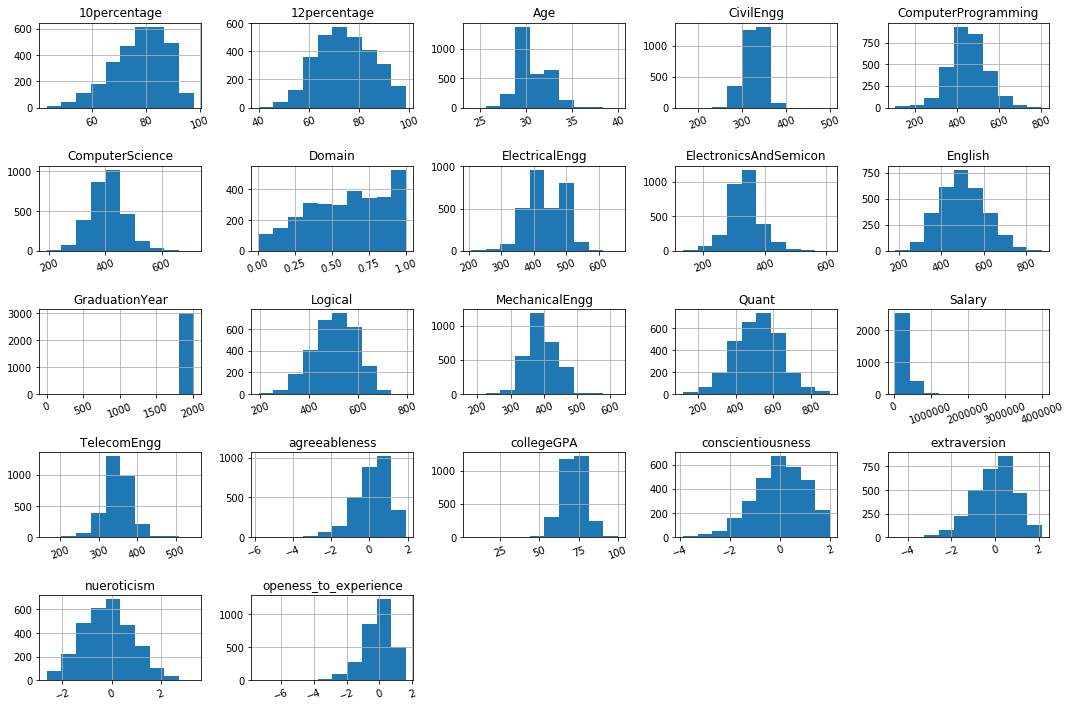

In [361]:
plt.rcParams['figure.figsize'] = [15,10] # Width, Height of the entire canvas/plot

Raw_Data.hist(xrot = 20) # We are using pandas hist() method for multiple histograms in one line of code

# Adjust the subplots (so that they dont overlap)
plt.tight_layout()

### Data Distribution: Categorical Variables

In [362]:
Raw_Data["Gender"].value_counts()

m    2282
f     716
Name: Gender, dtype: int64

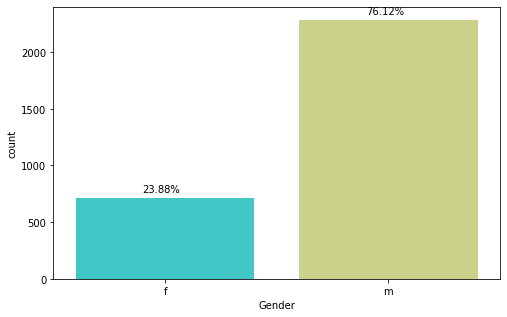

In [363]:
plt.figure(figsize = (8,5))
sns.countplot(Raw_Data["Gender"],palette = "rainbow")
plt.text(x = -0.1,y = Raw_Data["Gender"].value_counts()[1]+50,
         s = str(round((Raw_Data["Gender"].value_counts()[1])*100/(len(Raw_Data)),2)) + "%")
plt.text(x = 0.9,y = Raw_Data["Gender"].value_counts()[0]+50,
         s = str(round((Raw_Data["Gender"].value_counts()[0])*100/(len(Raw_Data)),2)) + "%")
plt.show();

In [364]:
Raw_Data["Degree"].value_counts()

B.Tech/B.E.      2757
MCA               200
M.Tech./M.E.       40
M.Sc. (Tech.)       1
Name: Degree, dtype: int64

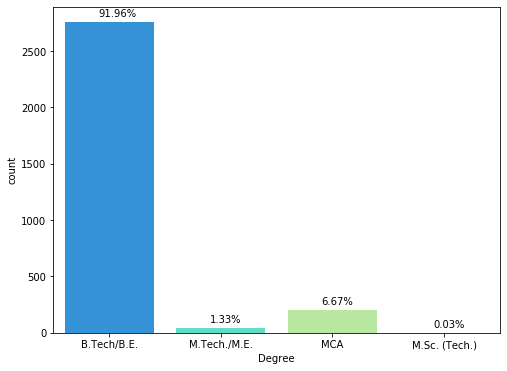

In [365]:
plt.figure(figsize = (8,6))
sns.countplot(Raw_Data["Degree"],palette = "rainbow")
plt.text(x = -0.1,y = Raw_Data["Degree"].value_counts()[0]+50,
         s = str(round((Raw_Data["Degree"].value_counts()[0])*100/(len(Raw_Data)),2)) + "%")
plt.text(x = 0.9,y = Raw_Data["Degree"].value_counts()[2]+50,
         s = str(round((Raw_Data["Degree"].value_counts()[2])*100/(len(Raw_Data)),2)) + "%")
plt.text(x = 1.9,y = Raw_Data["Degree"].value_counts()[1]+50,
         s = str(round((Raw_Data["Degree"].value_counts()[1])*100/(len(Raw_Data)),2)) + "%")
plt.text(x = 2.9,y = Raw_Data["Degree"].value_counts()[3]+50,
         s = str(round((Raw_Data["Degree"].value_counts()[3])*100/(len(Raw_Data)),2)) + "%")
plt.show();

In [366]:
Raw_Data["Specialization"].value_counts()

Computer_Science_and_Engineering               1177
electronics and communication engineering       670
Information_Technology                          507
Electronics_and_Electrical_Engineering          229
Mechanical_Engineering                          164
electronics & telecommunications                 89
Others                                           59
Electronics_and_Instrumentation_Engineering      47
Instrumentation_and_Control_Engineering          22
Information_Science_Engineering                  19
civil engineering                                15
Name: Specialization, dtype: int64

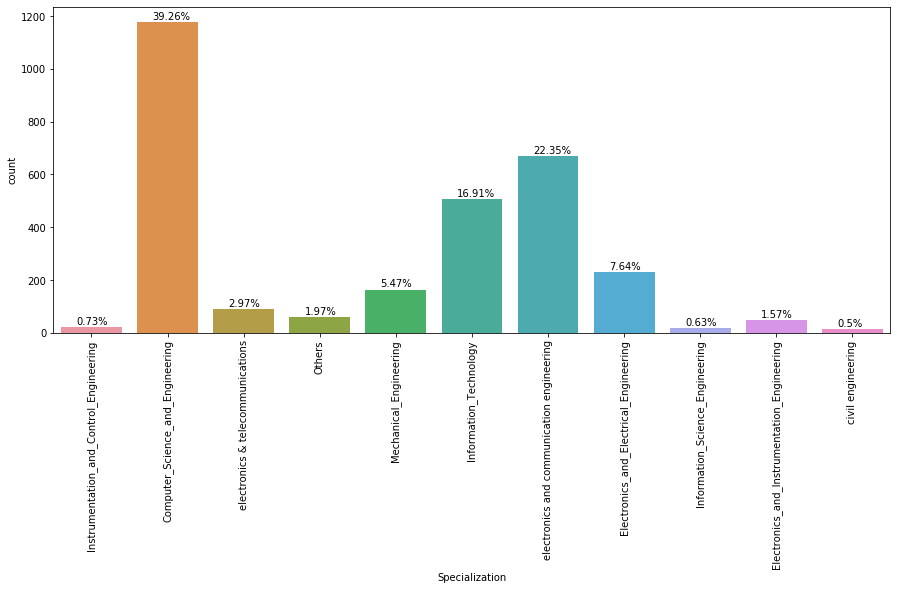

In [367]:
plt.figure(figsize = (15,6))
sns.countplot(Raw_Data["Specialization"])
plt.xticks(rotation = "vertical");
plt.text(x = -0.2,y = Raw_Data["Specialization"].value_counts()[8]+10,
         s = str(round((Raw_Data["Specialization"].value_counts()[8])*100/(len(Raw_Data)),2)) + "%")
plt.text(x = 0.8,y = Raw_Data["Specialization"].value_counts()[0]+10,
         s = str(round((Raw_Data["Specialization"].value_counts()[0])*100/(len(Raw_Data)),2)) + "%")
plt.text(x = 1.8,y = Raw_Data["Specialization"].value_counts()[5]+10,
         s = str(round((Raw_Data["Specialization"].value_counts()[5])*100/(len(Raw_Data)),2)) + "%")
plt.text(x = 2.8,y = Raw_Data["Specialization"].value_counts()[6]+10,
         s = str(round((Raw_Data["Specialization"].value_counts()[6])*100/(len(Raw_Data)),2)) + "%")
plt.text(x = 3.8,y = Raw_Data["Specialization"].value_counts()[4]+10,
         s = str(round((Raw_Data["Specialization"].value_counts()[4])*100/(len(Raw_Data)),2)) + "%")
plt.text(x = 4.8,y = Raw_Data["Specialization"].value_counts()[2]+10,
         s = str(round((Raw_Data["Specialization"].value_counts()[2])*100/(len(Raw_Data)),2)) + "%")
plt.text(x = 5.8,y = Raw_Data["Specialization"].value_counts()[1]+10,
         s = str(round((Raw_Data["Specialization"].value_counts()[1])*100/(len(Raw_Data)),2)) + "%")
plt.text(x = 6.8,y = Raw_Data["Specialization"].value_counts()[3]+10,
         s = str(round((Raw_Data["Specialization"].value_counts()[3])*100/(len(Raw_Data)),2)) + "%")
plt.text(x = 7.8,y = Raw_Data["Specialization"].value_counts()[9]+10,
         s = str(round((Raw_Data["Specialization"].value_counts()[9])*100/(len(Raw_Data)),2)) + "%")
plt.text(x = 8.8,y = Raw_Data["Specialization"].value_counts()[7]+10,
         s = str(round((Raw_Data["Specialization"].value_counts()[7])*100/(len(Raw_Data)),2)) + "%")
plt.text(x = 9.8,y = Raw_Data["Specialization"].value_counts()[10]+10,
         s = str(round((Raw_Data["Specialization"].value_counts()[10])*100/(len(Raw_Data)),2)) + "%")


plt.show();

In [368]:
Raw_Data["CollegeState"].value_counts()

Northern_India         1069
Southern_India          990
Western_India           334
Eastern_India           303
Central_India           161
Union_Territory         132
North_Eastern_India       9
Name: CollegeState, dtype: int64

Text(5.8, 19, '0.3%')

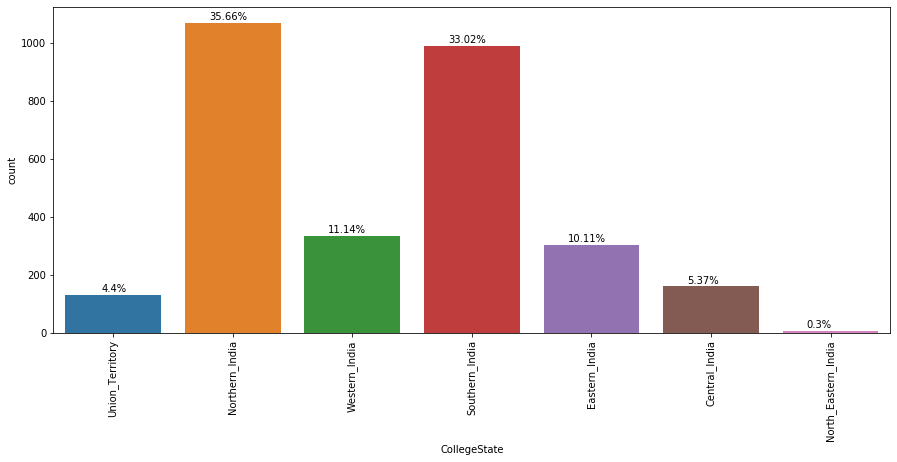

In [369]:
plt.figure(figsize = (15,6))
sns.countplot(Raw_Data["CollegeState"])
plt.xticks(rotation = "vertical");
plt.text(x = -0.1,y = Raw_Data["CollegeState"].value_counts()[5]+10,
         s = str(round((Raw_Data["CollegeState"].value_counts()[5])*100/(len(Raw_Data)),2)) + "%")
plt.text(x = 0.8,y = Raw_Data["CollegeState"].value_counts()[0]+10,
         s = str(round((Raw_Data["CollegeState"].value_counts()[0])*100/(len(Raw_Data)),2)) + "%")
plt.text(x = 1.8,y = Raw_Data["CollegeState"].value_counts()[2]+10,
         s = str(round((Raw_Data["CollegeState"].value_counts()[2])*100/(len(Raw_Data)),2)) + "%")
plt.text(x = 2.8,y = Raw_Data["CollegeState"].value_counts()[1]+10,
         s = str(round((Raw_Data["CollegeState"].value_counts()[1])*100/(len(Raw_Data)),2)) + "%")
plt.text(x = 3.8,y = Raw_Data["CollegeState"].value_counts()[3]+10,
         s = str(round((Raw_Data["CollegeState"].value_counts()[3])*100/(len(Raw_Data)),2)) + "%")
plt.text(x = 4.8,y = Raw_Data["CollegeState"].value_counts()[4]+10,
         s = str(round((Raw_Data["CollegeState"].value_counts()[4])*100/(len(Raw_Data)),2)) + "%")
plt.text(x = 5.8,y = Raw_Data["CollegeState"].value_counts()[6]+10,
         s = str(round((Raw_Data["CollegeState"].value_counts()[6])*100/(len(Raw_Data)),2)) + "%")

### Impact Analysis: Continuous Variables Using Correlation

In [370]:
cont = Raw_Data.columns[Raw_Data.dtypes != object]
cont

Index(['10percentage', 'Age', '12percentage', 'collegeGPA', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'Salary'],
      dtype='object')

In [371]:
# hand picking some continous variables for the pairplot() method as all variables wouldn't make much sense in pairplot()
cont_vars=["10percentage","12percentage","collegeGPA",'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg','CivilEngg','Salary']

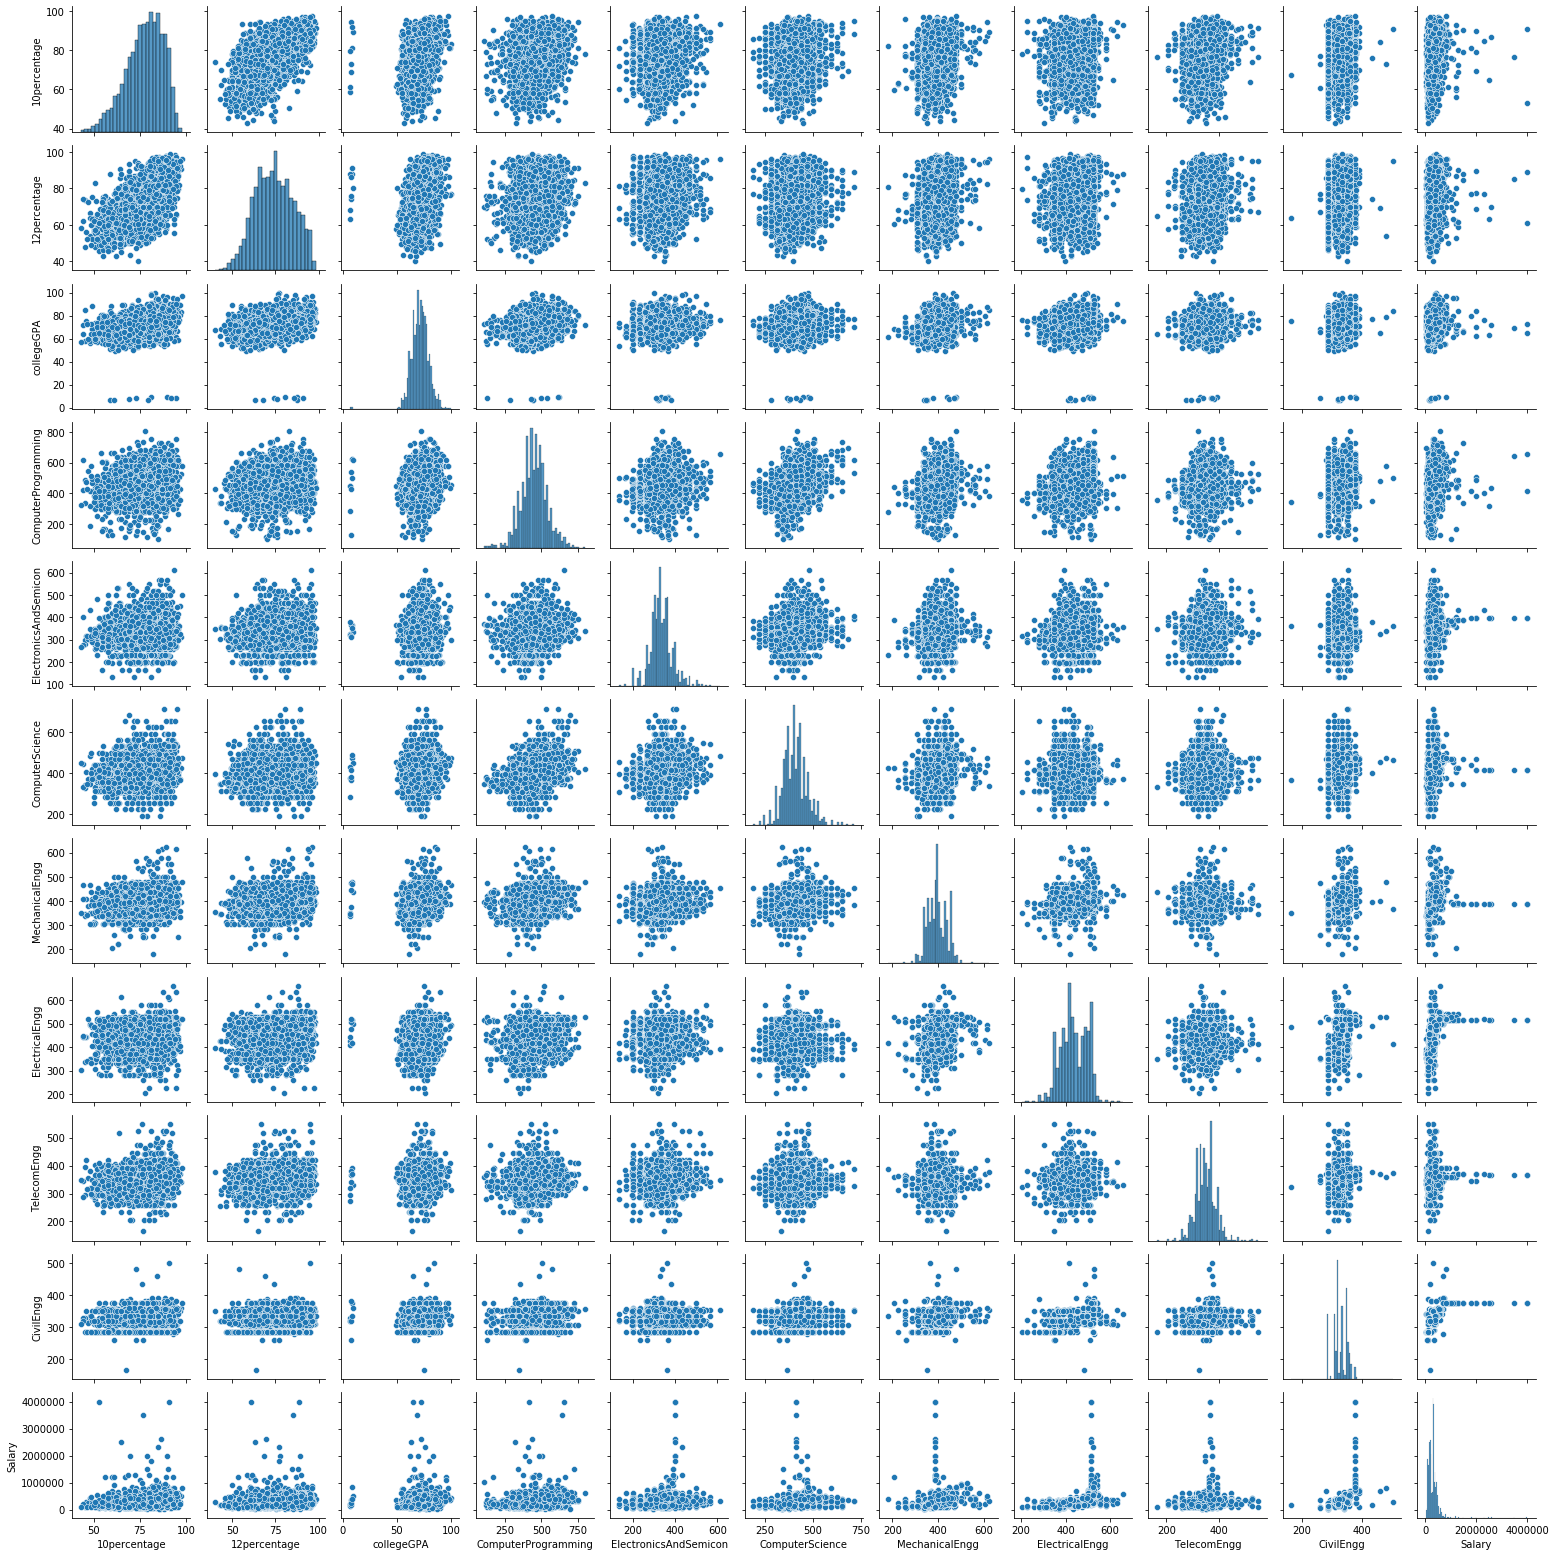

In [372]:
import seaborn as sns
sns.pairplot(Raw_Data[cont_vars],height=2)

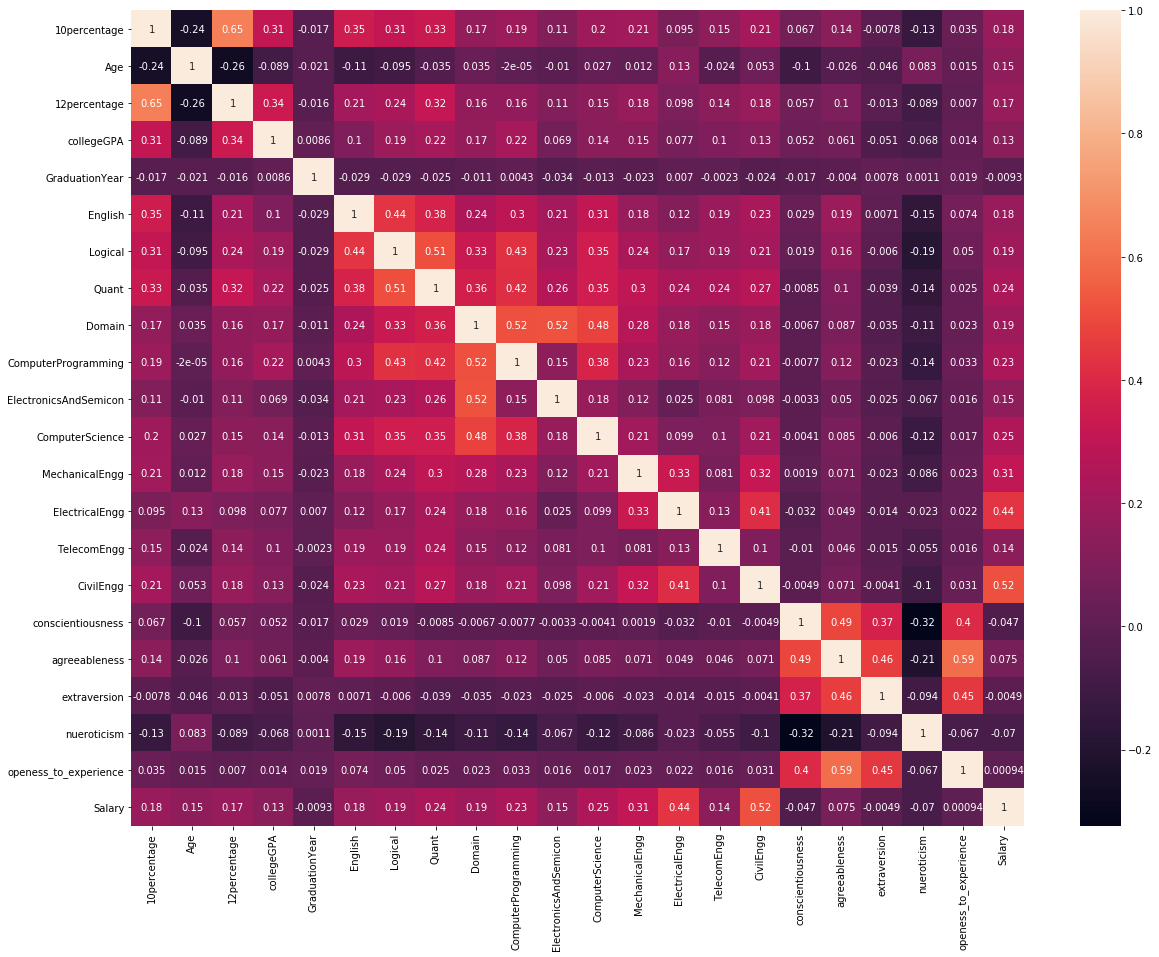

In [373]:
plt.figure(figsize=(20,15))
sns.heatmap(Raw_Data.corr(),annot=True);

### Impact Analysis: Categorical Variables Using Boxplot

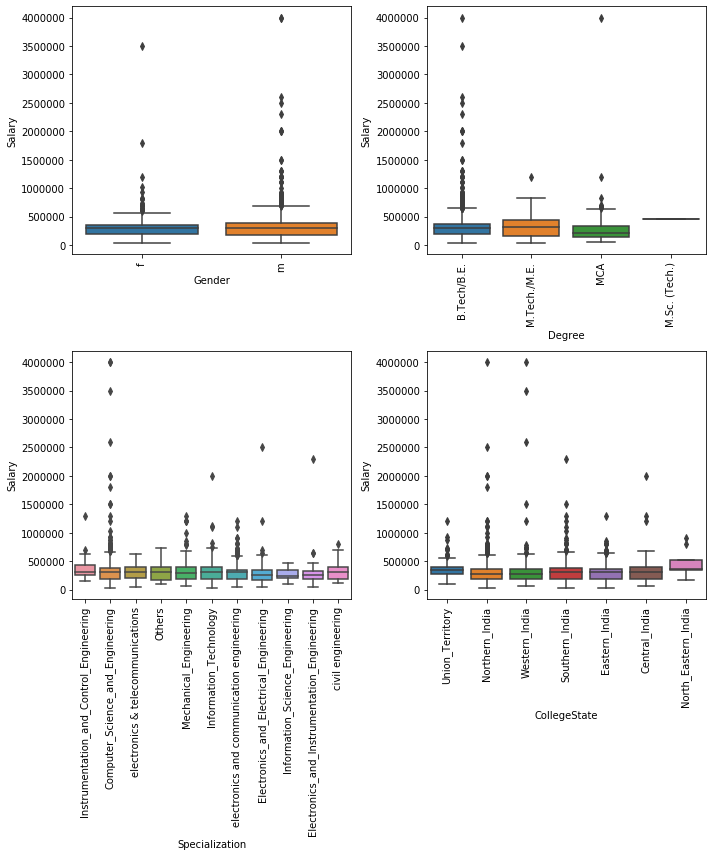

In [374]:
fig, ax = plt.subplots(2, 2, figsize = (10,12)) 

for variable, subplot in zip(categoricalVars, ax.flatten()): # ax.faltten() to get a flat array of 2*3 elements (6 plots in all)
    
    plot  = sns.boxplot(y = Raw_Data["Salary"], x = Raw_Data[variable], ax = subplot)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

plt.tight_layout();

### Outliers Checks

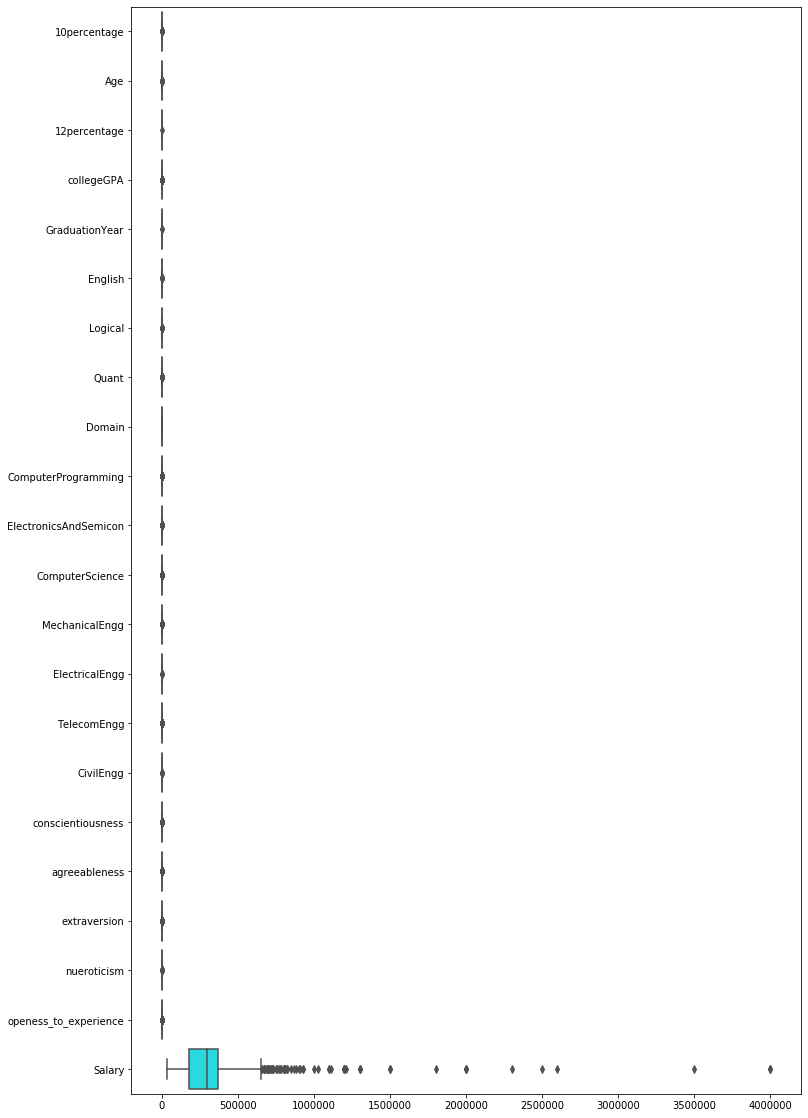

In [375]:
plt.rcParams['figure.figsize'] = (12,20)
sns.boxplot(data=Raw_Data, orient="h", palette="cool_r");

In [376]:
Q1 = Raw_Data.quantile(0.25)
Q3 = Raw_Data.quantile(0.75)
IQR0 = Q3 - Q1
print(IQR0)

10percentage                 14.460000
Age                           3.000000
12percentage                 16.600000
collegeGPA                    9.770000
GraduationYear                2.000000
English                     145.000000
Logical                     123.750000
Quant                       165.000000
Domain                        0.461561
ComputerProgramming         110.000000
ElectronicsAndSemicon        63.800000
ComputerScience              74.000000
MechanicalEngg               62.400000
ElectricalEngg              101.000000
TelecomEngg                  47.600000
CivilEngg                    35.400000
conscientiousness             1.351800
agreeableness                 1.248100
extraversion                  1.276800
nueroticism                   1.394400
openess_to_experience         1.171600
Salary                   190000.000000
dtype: float64


In [377]:
IQR0.count()

22

**Below Plot shows the Outliers for each numerical column in the Dataset**

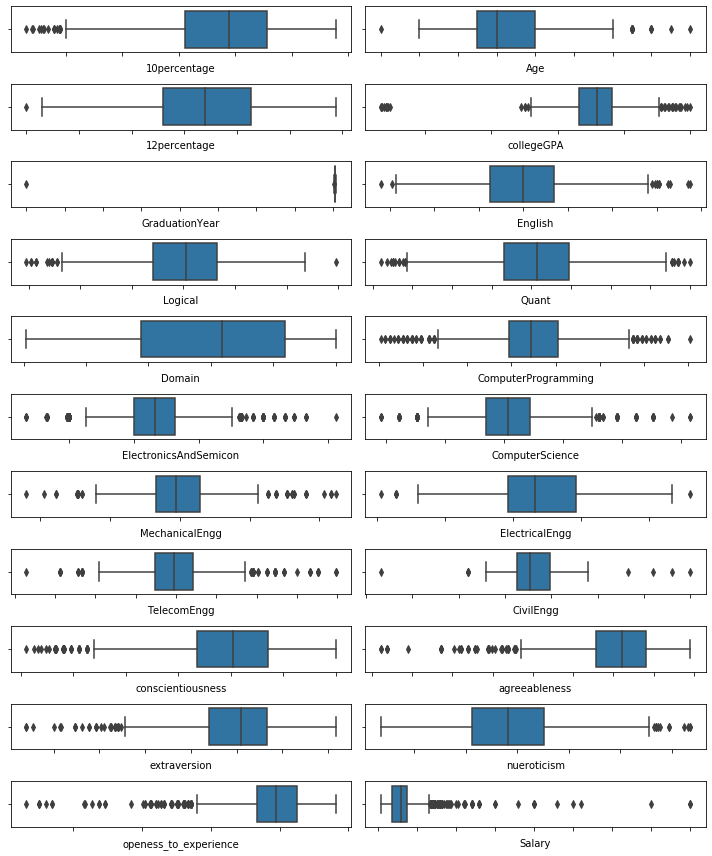

In [378]:
fig, ax = plt.subplots(11, 2, figsize = (10,12)) 

for variable, subplot in zip(IQR0.index, ax.flatten()): # ax.faltten() to get a flat array of 2*3 elements (6 plots in all)
    
    plot  = sns.boxplot(x = Raw_Data[variable],ax = subplot)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

plt.tight_layout();

# plt.tight_layout();

**From observation of above plots, all the Columns except "Domain" have Outliers**

### Outlier Analysis

In [379]:
#Removing the column "Salary" as no modification is to be done for the Target variable 

IQR0.drop("Salary",inplace=True)

In [380]:
for i in IQR0.index:
    Q1 = Raw_Data[i].quantile(q = 0.25)
    Q3 = Raw_Data[i].quantile(q = 0.75)

    IQR = Q3 - Q1
    print(IQR)
    upper_limit= Q3 + (1.5*IQR)
    lower_limit= Q1 - (1.5*IQR)
    Raw_Data[i] = np.where(Raw_Data[i] <lower_limit ,lower_limit,Raw_Data[i])
    Raw_Data[i] = np.where(Raw_Data[i] > upper_limit,upper_limit,Raw_Data[i])

14.459999999999994
3.0
16.599999999999994
9.769999999999996
2.0
145.0
123.75
165.0
0.4615611389999999
110.0
63.80000000000001
74.0
62.400000000000034
100.99999999999994
47.60000000000002
35.400000000000034
1.3518
1.2481
1.2768000000000002
1.3944
1.1716


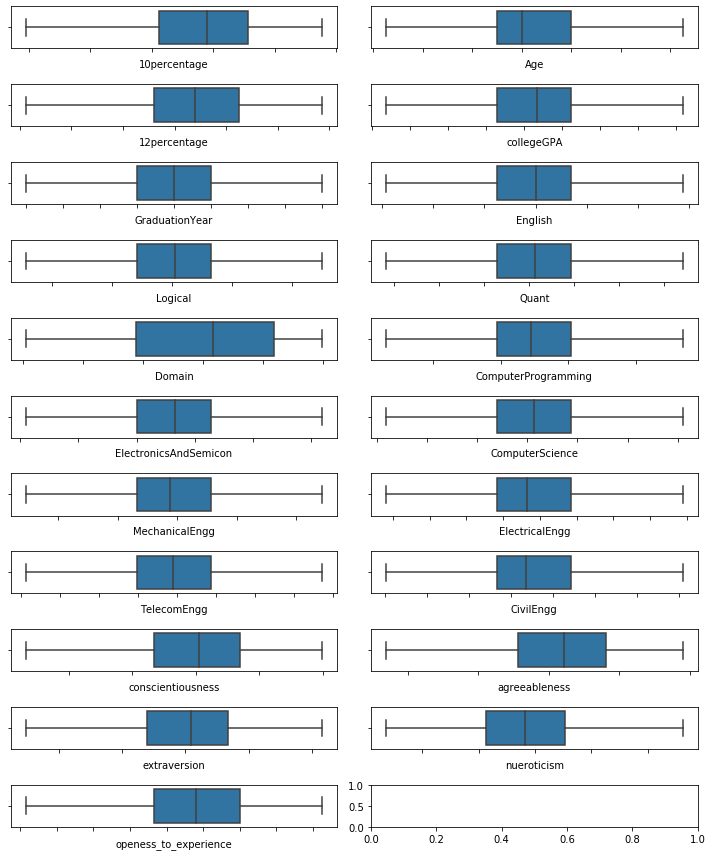

In [381]:
fig, ax = plt.subplots(11, 2, figsize = (10,12)) 

for variable, subplot in zip(IQR0.index, ax.flatten()): # ax.faltten() to get a flat array of 2*3 elements (6 plots in all)
    
    plot  = sns.boxplot(x = Raw_Data[variable],ax = subplot)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

plt.tight_layout();

# plt.tight_layout();

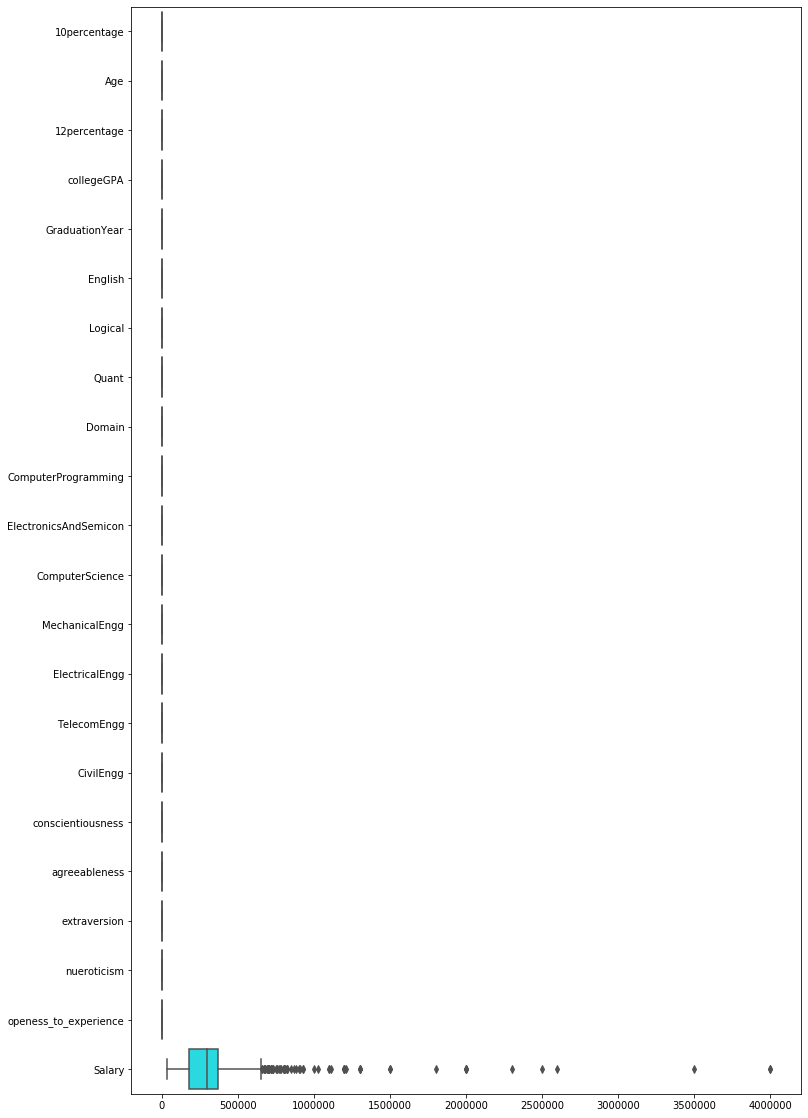

In [382]:
plt.rcParams['figure.figsize'] = (12,20)
sns.boxplot(data=Raw_Data, orient="h", palette="cool_r");

### Splitting the Independent and Target features

In [383]:
# Independent Features both continuous and categorical variables

Indpt_Var = Raw_Data.drop("Salary",axis = 1)
Indpt_Var

,Gender,Degree,Specialization,CollegeState,10percentage,Age,12percentage,collegeGPA,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,f,B.Tech/B.E.,Instrumentation_and_Control_Engineering,Union_Territory,87.80,31.0,84.00,73.82,2013.0,650.0,665.0,810.0,0.694479,485.0,366.0,450.4,478.6,494.4,329.2,334.4,-0.1590,0.3789,1.2396,0.14590,0.2889
1,m,B.Tech/B.E.,Computer_Science_and_Engineering,Northern_India,57.00,31.0,64.50,65.00,2014.0,440.0,435.0,210.0,0.342315,365.0,297.6,309.0,351.2,280.0,323.6,286.0,1.1336,0.0459,1.2396,0.52620,-0.2859
2,m,B.Tech/B.E.,electronics & telecommunications,Western_India,77.33,32.0,85.17,61.94,2011.0,485.0,475.0,505.0,0.824666,355.0,400.0,401.0,414.0,510.6,260.0,352.0,0.5100,-0.1232,1.5428,-0.29020,-0.2875
3,m,B.Tech/B.E.,Computer_Science_and_Engineering,Union_Territory,84.30,30.0,86.00,80.40,2013.0,675.0,620.0,635.0,0.990009,655.0,372.8,450.4,456.8,473.2,329.0,334.4,-0.4463,0.2124,0.3174,0.27270,0.4805
4,f,B.Tech/B.E.,Others,Southern_India,82.00,31.0,75.00,64.30,2012.0,575.0,495.0,365.0,0.278457,315.0,397.6,388.6,363.0,359.2,422.0,320.6,-1.4992,-0.7473,-1.0697,0.06223,0.1864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,f,B.Tech/B.E.,electronics and communication engineering,Southern_India,75.00,32.0,73.00,70.00,2010.0,505.0,485.0,445.0,0.538387,245.0,333.0,394.6,342.8,349.6,319.4,286.0,-1.1901,0.9688,-1.0697,1.35490,0.0284
2994,f,B.Tech/B.E.,Information_Technology,Southern_India,84.00,30.0,77.00,75.20,2012.0,345.0,585.0,395.0,0.190153,315.0,347.0,401.0,344.0,349.6,319.4,286.0,-0.1082,0.0328,-0.4891,-0.29020,0.5024
2995,m,B.Tech/B.E.,Information_Technology,Central_India,91.40,33.0,65.56,73.19,2011.0,385.0,425.0,485.0,0.600057,435.0,279.8,456.6,421.8,418.8,377.0,322.4,-0.8810,0.1888,-0.3440,0.06230,0.6603
2996,m,B.Tech/B.E.,Computer_Science_and_Engineering,Southern_India,88.64,33.0,65.16,74.81,2011.0,465.0,645.0,505.0,0.901490,545.0,346.2,407.2,400.2,521.2,364.4,357.2,1.4374,1.2808,-0.4891,-1.46537,0.5419


In [384]:
# Dependent/Target Feature

Dept_Var = Raw_Data["Salary"]
Dept_Var

0       445000.0
1       110000.0
2       255000.0
3       420000.0
4       200000.0
          ...   
2993    120000.0
2994    120000.0
2995    385000.0
2996    530000.0
2997    200000.0
Name: Salary, Length: 2998, dtype: float64

In [385]:
# Filtering out only the Continuous Variables

Cont_Var=[col for col in Indpt_Var.columns if Indpt_Var[col].dtypes!=object]
Cont_Var

['10percentage',
 'Age',
 '12percentage',
 'collegeGPA',
 'GraduationYear',
 'English',
 'Logical',
 'Quant',
 'Domain',
 'ComputerProgramming',
 'ElectronicsAndSemicon',
 'ComputerScience',
 'MechanicalEngg',
 'ElectricalEngg',
 'TelecomEngg',
 'CivilEngg',
 'conscientiousness',
 'agreeableness',
 'extraversion',
 'nueroticism',
 'openess_to_experience']

In [386]:
categoricalVars # Filter done during plotting 

Index(['Gender', 'Degree', 'Specialization', 'CollegeState'], dtype='object')

## Dummy creation for Categorical variables

In [387]:
dummy_var = pd.get_dummies(Indpt_Var[categoricalVars],drop_first = True)
dummy_var

,Gender_m,Degree_M.Sc. (Tech.),Degree_M.Tech./M.E.,Degree_MCA,Specialization_Electronics_and_Electrical_Engineering,Specialization_Electronics_and_Instrumentation_Engineering,Specialization_Information_Science_Engineering,Specialization_Information_Technology,Specialization_Instrumentation_and_Control_Engineering,Specialization_Mechanical_Engineering,Specialization_Others,Specialization_civil engineering,Specialization_electronics & telecommunications,Specialization_electronics and communication engineering,CollegeState_Eastern_India,CollegeState_North_Eastern_India,CollegeState_Northern_India,CollegeState_Southern_India,CollegeState_Union_Territory,CollegeState_Western_India
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2994,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2995,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## Feature Scaling Continuous Variables by Standardization

In [388]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
scaling = pd.DataFrame(sc.fit_transform(Indpt_Var[Cont_Var]), columns = Cont_Var)
scaling.head()

,10percentage,Age,12percentage,collegeGPA,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,1.016186,0.249636,0.868785,0.299829,0.297960,1.420185,1.892646,2.432643,0.344189,0.412521,0.621133,0.714993,1.961004,0.958912,-0.537965,0.287046,-0.125441,0.264168,1.319645,0.290607,0.447803
1,-2.076659,0.249636,-0.885233,-0.902733,1.063415,-0.581010,-0.754060,-2.500658,-0.972494,-0.969171,-0.741091,-1.676727,-1.059992,-2.652879,-0.694873,-1.815199,1.158012,-0.111593,1.319645,0.667587,-0.194092
2,-0.035181,0.827781,0.974026,-1.319948,-1.232949,-0.152183,-0.293763,-0.075118,0.830936,-1.084312,1.298261,-0.120587,0.429165,1.231818,-2.476895,1.051499,0.538825,-0.302407,1.641878,-0.141685,-0.195879
3,0.664726,-0.328509,1.048685,1.196978,0.297960,1.658423,1.374812,0.993763,1.449122,2.369920,0.756558,0.714993,1.444068,0.601776,-0.543569,0.287046,-0.410707,0.076287,0.339556,0.416300,0.661768
4,0.433767,0.249636,0.059238,-0.998174,-0.467494,0.705472,-0.063615,-1.226222,-1.211246,-1.544877,1.250464,-0.330327,-0.780182,-1.318672,2.062218,-0.312354,-1.456156,-1.006649,-1.134615,0.207668,0.333339


**Combining both the dummy creation of categorical var data and standardization data done for cont var**

In [389]:
final = pd.concat([dummy_var,scaling],axis = 1)
final

,Gender_m,Degree_M.Sc. (Tech.),Degree_M.Tech./M.E.,Degree_MCA,Specialization_Electronics_and_Electrical_Engineering,Specialization_Electronics_and_Instrumentation_Engineering,Specialization_Information_Science_Engineering,Specialization_Information_Technology,Specialization_Instrumentation_and_Control_Engineering,Specialization_Mechanical_Engineering,Specialization_Others,Specialization_civil engineering,Specialization_electronics & telecommunications,Specialization_electronics and communication engineering,CollegeState_Eastern_India,CollegeState_North_Eastern_India,CollegeState_Northern_India,CollegeState_Southern_India,CollegeState_Union_Territory,CollegeState_Western_India,10percentage,Age,12percentage,collegeGPA,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1.016186,0.249636,0.868785,0.299829,0.297960,1.420185,1.892646,2.432643,0.344189,0.412521,0.621133,0.714993,1.961004,0.958912,-0.537965,0.287046,-0.125441,0.264168,1.319645,0.290607,0.447803
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-2.076659,0.249636,-0.885233,-0.902733,1.063415,-0.581010,-0.754060,-2.500658,-0.972494,-0.969171,-0.741091,-1.676727,-1.059992,-2.652879,-0.694873,-1.815199,1.158012,-0.111593,1.319645,0.667587,-0.194092
2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,-0.035181,0.827781,0.974026,-1.319948,-1.232949,-0.152183,-0.293763,-0.075118,0.830936,-1.084312,1.298261,-0.120587,0.429165,1.231818,-2.476895,1.051499,0.538825,-0.302407,1.641878,-0.141685,-0.195879
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.664726,-0.328509,1.048685,1.196978,0.297960,1.658423,1.374812,0.993763,1.449122,2.369920,0.756558,0.714993,1.444068,0.601776,-0.543569,0.287046,-0.410707,0.076287,0.339556,0.416300,0.661768
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0.433767,0.249636,0.059238,-0.998174,-0.467494,0.705472,-0.063615,-1.226222,-1.211246,-1.544877,1.250464,-0.330327,-0.780182,-1.318672,2.062218,-0.312354,-1.456156,-1.006649,-1.134615,0.207668,0.333339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,-0.269152,0.827781,-0.120661,-0.221008,-1.998403,0.038407,-0.178689,-0.568449,-0.239414,-2.350864,-0.036080,-0.228840,-1.259178,-1.480394,-0.812554,-1.815199,-1.149244,0.929818,-1.134615,1.489051,0.156896
2994,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0.634601,-0.328509,0.239138,0.487985,-0.467494,-1.486313,0.972053,-0.979557,-1.541400,-1.544877,0.242737,-0.120587,-1.230723,-1.480394,-0.812554,-1.815199,-0.075000,-0.126375,-0.517570,-0.141685,0.686224
2995,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.377687,1.405925,-0.789886,0.213932,-1.232949,-1.105133,-0.869134,-0.239562,-0.008840,-0.163184,-1.095588,0.819863,0.614124,-0.314648,0.801353,-0.234171,-0.842331,0.049657,-0.363361,0.207737,0.862556
2996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1.100536,1.405925,-0.825866,0.434811,-1.232949,-0.342773,1.662498,-0.075118,1.118164,1.103368,0.226805,-0.015716,0.101930,1.410386,0.448311,1.277360,1.459662,1.281882,-0.517570,-1.306594,0.730335


In [390]:
final.shape

(2998, 41)

## Splitting Training and Testing set

In [391]:
X = final.copy() # Independent Features 
Y = Dept_Var # Dependent/Target Features

In [392]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size = 0.80,random_state = 101)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2398, 41)
(2398,)
(600, 41)
(600,)


In [393]:
# In statsmodels library, linear regression function does NOT account for an intercept by default.
# So, we need to explicitly add intercept (in the df) - a column called "const" with all values being 1 in it.

from statsmodels.api import add_constant, OLS

X_train = add_constant(X_train)
X_test = add_constant(X_test)

print(X_train.shape)
print(X_test.shape)

(2398, 42)
(600, 42)


In [394]:
trainXCopy1 = X_train.copy()

**Calculating VIF_Scores for each column**

In [395]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = trainXCopy1.columns
  
# calculating VIF for each feature
vif_data["VIF_Score"] = [variance_inflation_factor(trainXCopy1.values, i)
                          for i in range(len(trainXCopy1.columns))]

In [396]:
vif_data

,feature,VIF_Score
0,const,25.217242
1,Gender_m,1.148496
2,Degree_M.Sc. (Tech.),1.087591
3,Degree_M.Tech./M.E.,1.129906
4,Degree_MCA,1.526123
5,Specialization_Electronics_and_Electrical_Engi...,1.239429
6,Specialization_Electronics_and_Instrumentation...,1.073714
7,Specialization_Information_Science_Engineering,1.135547
8,Specialization_Information_Technology,1.283356
9,Specialization_Instrumentation_and_Control_Eng...,1.045206


### Variance Inflation Factor for multicollinearity checks

In [397]:
tempMaxVIF = 10
maxVIF = 10 # I have chosen 10 here as keeping 5 kicks almost all variables out.
trainXCopy = X_train.copy()
counter = 1
highVIFColumnNames = []

while (tempMaxVIF >= maxVIF):
    
    # Create an empty temporary df to store VIF values
    tempVIFDf = pd.DataFrame()
    
    # Calculate VIF using list comprehension
    tempVIFDf['VIF'] = [variance_inflation_factor(trainXCopy.values, i) for i in range(trainXCopy.shape[1])]
    
    # Create a new column "Column_Name" to store the col names against the VIF values from list comprehension
    tempVIFDf['Column_Name'] = trainXCopy.columns
    
    # Drop NA rows from the df - If there is some calculation error resulting in NAs
    tempVIFDf.dropna(inplace=True)
    
    # Sort the df based on VIF values, then pick the top most column name (which has the highest VIF)
    tempColumnName = tempVIFDf.sort_values(["VIF"])[-1:]["Column_Name"].values[0]
    
    # Store the max VIF value in tempMaxVIF
    tempMaxVIF = tempVIFDf.sort_values(["VIF"])[-1:]["VIF"].values[0]
    
    if (tempMaxVIF >= maxVIF): # This condition will ensure that columns having VIF lower than 5 are NOT dropped
        
        print(counter)
        print(tempColumnName)
        
        # Remove the highest VIF valued "Column" from trainXCopy. As the loop continues this step will keep removing highest VIF columns one by one 
        trainXCopy = trainXCopy.drop(tempColumnName, axis = 1)    
        highVIFColumnNames.append(tempColumnName)
    
    counter = counter + 1


1
const


**Only the "const" variable have high VIF value indicating it as highly collinear** 

In [398]:
print(highVIFColumnNames)

['const']


In [399]:
# Remove all those variables which have high VIF

print("Columns having high VIF:",highVIFColumnNames)

highVIFColumnNames.remove('const') # We need to exclude 'const' column from getting dropped/ removed. This is the intercept.
print("After removal of const",highVIFColumnNames)
print(len(highVIFColumnNames))

X_train = X_train.drop(highVIFColumnNames, axis = 1)
X_test = X_test.drop(highVIFColumnNames, axis = 1)

print(X_train.shape)
print(X_test.shape)

Columns having high VIF: ['const']
After removal of const []
0
(2398, 42)
(600, 42)


**Since "const" variable is the intecept for model, hence not removing** 

# Stochastic Gradient Descent (SGD)

In [400]:
from sklearn.linear_model import SGDRegressor
sgdModel = SGDRegressor(fit_intercept = False, random_state = 7) 
sgdModel.fit(X_train, Y_train)

SGDRegressor(fit_intercept=False, random_state=7)

In [401]:
sgdModel.coef_

array([275237.72073364,  15841.00010657,   1142.24038932,  11213.10626615,
        14649.75353432,  -3357.59064734,   4701.76939659,   6373.71833048,
       -10011.24142987,   8290.3548938 , -16699.27051558,  -6457.31935407,
        -2181.59038926, -19238.66721978, -25277.30659435,  16174.5175589 ,
         7457.23969023,  29744.01855401,  14733.48490186,  35724.44038945,
        56958.42062844,  11705.24926725,   6172.65372164,  14529.32292048,
         9180.78127482, -24744.86456204,  -1104.69599078,  -4773.30758855,
       -12579.01236146, -27558.48364415,  23269.35863661,  32310.81655893,
        27133.84879871,  15894.39896758,  46921.05361969,  13840.32020626,
        71732.79974018,  -6091.0437608 ,  12078.09063301,   1927.51711334,
        -1472.37658029,  -8133.63761266])

In [402]:
pd.DataFrame({"Variable": X_train.columns, "Coeff": sgdModel.coef_})

,Variable,Coeff
0,const,275237.720734
1,Gender_m,15841.000107
2,Degree_M.Sc. (Tech.),1142.240389
3,Degree_M.Tech./M.E.,11213.106266
4,Degree_MCA,14649.753534
5,Specialization_Electronics_and_Electrical_Engi...,-3357.590647
6,Specialization_Electronics_and_Instrumentation...,4701.769397
7,Specialization_Information_Science_Engineering,6373.718330
8,Specialization_Information_Technology,-10011.241430
9,Specialization_Instrumentation_and_Control_Eng...,8290.354894


In [403]:
testPred = sgdModel.predict(X_test)
pd.DataFrame({"Actual": Y_test[:6], "Prediction": testPred[0:6]})

,Actual,Prediction
2394,180000.0,287620.434637
1624,160000.0,168085.024272
1459,660000.0,465730.566454
1767,180000.0,219507.020856
457,145000.0,188757.444736
508,310000.0,415061.644809


### Model Evaluation

In [404]:
# RMSE
print("RMSE:",np.sqrt(np.mean((Y_test - testPred)**2)))

RMSE: 126044.74197890624


In [405]:
# MAPE
print("MAPE:",(np.mean(np.abs(((Y_test - testPred)/Y_test))))*100)

MAPE: 32.851401997652296


**Extremely high RMSE and MAPE. Lets see what closed form solution produces.**

# Closed Form Solution (CFS)

In [406]:
# Building the model

closedFormModel = OLS(Y_train, X_train).fit()
closedFormModel.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     36.23
Date:                Sun, 21 Nov 2021   Prob (F-statistic):          1.22e-216
Time:                        17:37:09   Log-Likelihood:                -32303.
No. Observations:                2398   AIC:                         6.469e+04
Df Residuals:                    2356   BIC:                         6.493e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                       3.141e+05   1.77e+04     17.710      0.000    2.79e+05    3.49e+05
Gender_m                                                    1.421e+04   8929.980      1.591      0.112   -3299.484    3.17e+04
Degree_M.Sc. (Tech.)                                        3.853e+04    1.8e+05      0.214      0.831   -3.15e+05    3.92e+05
Degree_M.Tech./M.E.                                         2.091e+04   3.32e+04      0.629      0.529   -4.43e+04    8.61e+04
Degree_MCA                                                  8723.8853   1.76e+04      0.495      0.621   -2.59e+04    4.33e+04
Specialization_Electronics_and_Electrical_Engineering      -1.352e+04   1.49e+04     -0.906      0.365   -4.28e+04    1.57e+04
Specialization_Electronics_and_Instrumentation_Engineering -8455.4402   2.79e+04     -0.303      0.762   -6.32e+04    4.63e+04
Specialization_Information_Science_Engineering              8486.5215   4.62e+04      0.184      0.854   -8.22e+04    9.91e+04
Specialization_Information_Technology                      -1.931e+04   1.07e+04     -1.806      0.071   -4.03e+04    1652.106
Specialization_Instrumentation_and_Control_Engineering      4992.9184    4.3e+04      0.116      0.908   -7.94e+04    8.94e+04
Specialization_Mechanical_Engineering                      -2.881e+04   1.72e+04     -1.674      0.094   -6.26e+04    4948.065
Specialization_Others                                      -2.526e+04   2.59e+04     -0.974      0.330   -7.61e+04    2.56e+04
Specialization_civil engineering                           -2.486e+04   4.56e+04     -0.545      0.586   -1.14e+05    6.46e+04
Specialization_electronics & telecommunications            -4.162e+04    2.2e+04     -1.893      0.058   -8.47e+04    1494.798
Specialization_electronics and communication engineering   -3.322e+04   1.04e+04     -3.204      0.001   -5.36e+04   -1.29e+04
CollegeState_Eastern_India                                 -1.606e+04   1.94e+04     -0.826      0.409   -5.42e+04    2.21e+04
CollegeState_North_Eastern_India                            4.863e+04   8.85e+04      0.550      0.583   -1.25e+05    2.22e+05
CollegeState_Northern_India                                -2737.2742   1.67e+04     -0.164      0.870   -3.55e+04       3e+04
CollegeState_Southern_India                                -1.915e+04   1.74e+04     -1.101      0.271   -5.32e+04    1.49e+04
CollegeState_Union_Territory                                2357.7914   2.36e+04      0.100      0.921    -4.4e+04    4.87e+04
CollegeState_Western_India                                  2.293e+04   1.92e+04      1.192      0.233   -1.48e+04    6.07e+04
10percentage                       

In [407]:
print(dir(closedFormModel))
closedFormModel.pvalues

['HC0_se', 'HC1_se', 'HC2_se', 'HC3_se', '_HCCM', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_cache', '_data_attr', '_get_robustcov_results', '_is_nested', '_use_t', '_wexog_singular_values', 'aic', 'bic', 'bse', 'centered_tss', 'compare_f_test', 'compare_lm_test', 'compare_lr_test', 'condition_number', 'conf_int', 'conf_int_el', 'cov_HC0', 'cov_HC1', 'cov_HC2', 'cov_HC3', 'cov_kwds', 'cov_params', 'cov_type', 'df_model', 'df_resid', 'diagn', 'eigenvals', 'el_test', 'ess', 'f_pvalue', 'f_test', 'fittedvalues', 'fvalue', 'get_influence', 'get_prediction', 'get_robustcov_results', 'initialize', 'k_constant', 'llf', 'load', 'model', 'mse_model', 'mse_resid', 'mse_total', 'nobs', 'normalized_c

const                                                         5.460333e-66
Gender_m                                                      1.116341e-01
Degree_M.Sc. (Tech.)                                          8.309131e-01
Degree_M.Tech./M.E.                                           5.292847e-01
Degree_MCA                                                    6.209497e-01
Specialization_Electronics_and_Electrical_Engineering         3.651745e-01
Specialization_Electronics_and_Instrumentation_Engineering    7.618616e-01
Specialization_Information_Science_Engineering                8.543671e-01
Specialization_Information_Technology                         7.097957e-02
Specialization_Instrumentation_and_Control_Engineering        9.076536e-01
Specialization_Mechanical_Engineering                         9.434774e-02
Specialization_Others                                         3.299093e-01
Specialization_civil engineering                              5.857966e-01
Specialization_electronic

In [408]:
tempMaxPValue = 0.1
maxPValue = 0.1
trainXCopy = X_train.copy()
counter = 1
highPValueColumnNames = []


while (tempMaxPValue >= maxPValue):
    
    tempModelDf = pd.DataFrame()    
    Model = OLS(Y_train, trainXCopy).fit() 
    tempModelDf['PValue'] = Model.pvalues
    tempModelDf['Column_Name'] = trainXCopy.columns
    tempModelDf.dropna(inplace=True) # If there is some calculation error resulting in NAs
    tempColumnName = tempModelDf.sort_values(["PValue"])[-1:]["Column_Name"].values[0]
    tempMaxPValue = tempModelDf.sort_values(["PValue"])[-1:]["PValue"].values[0]
    
    if (tempMaxPValue >= maxPValue): # This condition will ensure that ONLY columns having p-value lower than 0.1 are NOT dropped
        print(tempColumnName, tempMaxPValue)    
        trainXCopy = trainXCopy.drop(tempColumnName, axis = 1)    
        highPValueColumnNames.append(tempColumnName)
    
    counter = counter + 1

print(highPValueColumnNames)

CollegeState_Union_Territory 0.9205320293313956
English 0.9147290038274387
Specialization_Instrumentation_and_Control_Engineering 0.9041558657084353
Specialization_Information_Science_Engineering 0.8560599338954494
Degree_M.Sc. (Tech.) 0.7901796918521939
CollegeState_Northern_India 0.7676276540909561
Specialization_Electronics_and_Instrumentation_Engineering 0.7476030040078072
nueroticism 0.7394490376471663
extraversion 0.6911501930408471
Degree_MCA 0.6127993355415808
Specialization_civil engineering 0.5698431713703254
Degree_M.Tech./M.E. 0.567671484049469
CollegeState_North_Eastern_India 0.5581091074786599
Specialization_Electronics_and_Electrical_Engineering 0.36048623290918913
Specialization_Others 0.36724306499375436
Logical 0.28871350331867024
CollegeState_Eastern_India 0.21537745298502634
CollegeState_Southern_India 0.1400989289329049
10percentage 0.17474202554123955
Gender_m 0.19357907737764
Specialization_Mechanical_Engineering 0.197612057223971
Specialization_Information_Techn

In [409]:
Model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     86.29
Date:                Sun, 21 Nov 2021   Prob (F-statistic):          4.26e-233
Time:                        17:37:14   Log-Likelihood:                -32314.
No. Observations:                2398   AIC:                         6.466e+04
Df Residuals:                    2380   BIC:                         6.477e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                     3.064e+05   4311.341     71.079      0.000    2.98e+05    3.15e+05
Specialization_electronics and communication engineering  -2.25e+04   8946.618     -2.515      0.012      -4e+04   -4952.647
CollegeState_Western_India                                2.861e+04   1.16e+04      2.464      0.014    5837.974    5.14e+04
Age                                                       1.064e+04   5705.898      1.864      0.062    -553.210    2.18e+04
12percentage                                              1.402e+04   4256.322      3.294      0.001    5675.026    2.24e+04
collegeGPA                                                7821.3721   4065.337      1.924      0.054    -150.597    1.58e+04
GraduationYear                                           -2.228e+04   5555.621     -4.011      0.000   -3.32e+04   -1.14e+04
Quant                                                    -9458.0095   4505.799     -2.099      0.036   -1.83e+04    -622.313
Domain                                                   -2.873e+04   5311.586     -5.410      0.000   -3.92e+04   -1.83e+04
ComputerProgramming                                       2.187e+04   4624.812      4.730      0.000    1.28e+04    3.09e+04
ElectronicsAndSemicon                                     3.106e+04   4365.482      7.115      0.000    2.25e+04    3.96e+04
ComputerScience                                           2.756e+04   4257.814      6.472      0.000    1.92e+04    3.59e+04
MechanicalEngg                                            1.771e+04   4005.954      4.422      0.000    9857.908    2.56e+04
ElectricalEngg                                            4.755e+04   4091.716     11.622      0.000    3.95e+04    5.56e+04
TelecomEngg                                                1.42e+04   3738.837      3.798      0.000    6867.770    2.15e+04
CivilEngg                                                 7.072e+04   4068.294     17.383      0.000    6.27e+04    7.87e+04
agreeableness                                             8757.6106   4220.988      2.075      0.038     480.417     1.7e+04
openess_to_experience                                    -1.187e+04   4177.243     -2.841      0.005   -2.01e+04   -3676.180
==============================================================================
Omnibus:                     3903.327   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2984324.599
Skew:                          10.454   Prob(JB):                         0.00
Kurtosis:                     174.555   Cond. No.                         6.08
===============================================================

In [410]:
X_train = X_train.drop(highPValueColumnNames, axis = 1)
X_test = X_test.drop(highPValueColumnNames, axis = 1)

print(X_train.shape)
print(X_test.shape)

(2398, 18)
(600, 18)


In [411]:
# Build model on trainX, trainY (after removing insignificant columns)

Model = OLS(Y_train, X_train).fit()
Model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     86.29
Date:                Sun, 21 Nov 2021   Prob (F-statistic):          4.26e-233
Time:                        17:37:16   Log-Likelihood:                -32314.
No. Observations:                2398   AIC:                         6.466e+04
Df Residuals:                    2380   BIC:                         6.477e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                     3.064e+05   4311.341     71.079      0.000    2.98e+05    3.15e+05
Specialization_electronics and communication engineering  -2.25e+04   8946.618     -2.515      0.012      -4e+04   -4952.647
CollegeState_Western_India                                2.861e+04   1.16e+04      2.464      0.014    5837.974    5.14e+04
Age                                                       1.064e+04   5705.898      1.864      0.062    -553.210    2.18e+04
12percentage                                              1.402e+04   4256.322      3.294      0.001    5675.026    2.24e+04
collegeGPA                                                7821.3721   4065.337      1.924      0.054    -150.597    1.58e+04
GraduationYear                                           -2.228e+04   5555.621     -4.011      0.000   -3.32e+04   -1.14e+04
Quant                                                    -9458.0095   4505.799     -2.099      0.036   -1.83e+04    -622.313
Domain                                                   -2.873e+04   5311.586     -5.410      0.000   -3.92e+04   -1.83e+04
ComputerProgramming                                       2.187e+04   4624.812      4.730      0.000    1.28e+04    3.09e+04
ElectronicsAndSemicon                                     3.106e+04   4365.482      7.115      0.000    2.25e+04    3.96e+04
ComputerScience                                           2.756e+04   4257.814      6.472      0.000    1.92e+04    3.59e+04
MechanicalEngg                                            1.771e+04   4005.954      4.422      0.000    9857.908    2.56e+04
ElectricalEngg                                            4.755e+04   4091.716     11.622      0.000    3.95e+04    5.56e+04
TelecomEngg                                                1.42e+04   3738.837      3.798      0.000    6867.770    2.15e+04
CivilEngg                                                 7.072e+04   4068.294     17.383      0.000    6.27e+04    7.87e+04
agreeableness                                             8757.6106   4220.988      2.075      0.038     480.417     1.7e+04
openess_to_experience                                    -1.187e+04   4177.243     -2.841      0.005   -2.01e+04   -3676.180
==============================================================================
Omnibus:                     3903.327   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2984324.599
Skew:                          10.454   Prob(JB):                         0.00
Kurtosis:                     174.555   Cond. No.                         6.08
===============================================================

In [412]:
testPred = Model.predict(X_test)
pd.DataFrame({"Actual": Y_test[:6], "Prediction": testPred[0:6]})

,Actual,Prediction
2394,180000.0,280288.380906
1624,160000.0,146521.676123
1459,660000.0,484384.831264
1767,180000.0,229511.551884
457,145000.0,219601.100202
508,310000.0,367380.656459


### Model Evaluation

In [413]:
print("RMSE:",np.sqrt(np.mean((Y_test - testPred)**2)))

print("MAPE:",(np.mean(np.abs(((Y_test - testPred)/Y_test))))*100)

RMSE: 124599.39122683334
MAPE: 32.69462577011585


**MAPE is slightly Reduced than MAPE in SGD, but not by great margin**

## Tuning Learning rate 

In [414]:
sgdModel2 = SGDRegressor(fit_intercept = False, random_state = 7, eta0 = 0.0001) # Default eta0: 0.01
sgdModel2.fit(X_train, Y_train)

# Model Prediction

testPred = sgdModel2.predict(X_test)
pd.DataFrame({"Actual": Y_test[:6], "Prediction": testPred[0:6]})

,Actual,Prediction
2394,180000.0,298218.384656
1624,160000.0,170531.813891
1459,660000.0,464190.223176
1767,180000.0,249107.864441
457,145000.0,214838.500337
508,310000.0,358439.628755


### Model Evaluation

In [415]:
print("RMSE",np.sqrt(np.mean((Y_test - testPred)**2)))

print("MAPE",(np.mean(np.abs(((Y_test - testPred)/Y_test))))*100)

RMSE 124990.81144739992
MAPE 32.308185164311524


**Even after tuning the learning rate there is not much difference in the RMSE and MAPE**

# Decision Tree

In [416]:
X_train.shape

(2398, 18)

In [417]:
from sklearn.tree import DecisionTreeRegressor
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 101) 
  
# fit the regressor with X and Y data
regressor.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=101)

In [418]:
testPredDf = pd.DataFrame()

testPredDf['Prediction'] = regressor.predict(X_test) #Outputs the dept/predicted values of the Test set

# Create a column to store actuals
testPredDf["Actual"] = Y_test.values #Dependent variable of the Actual data

# Validate if the above worked
testPredDf.head()

,Prediction,Actual
0,190000.0,180000.0
1,180000.0,160000.0
2,700000.0,660000.0
3,140000.0,180000.0
4,145000.0,145000.0


### Model Evaluation

In [419]:
print("RMSE:",np.sqrt(np.mean((Y_test - testPred)**2)))

print("MAPE:",(np.mean(np.abs(((Y_test - testPred)/Y_test))))*100)

RMSE: 124990.81144739992
MAPE: 32.308185164311524


**Still no difference RMSE and MAPE is similar to the SGD & CFS models above**

# Random Forest

In [420]:
from sklearn.ensemble import RandomForestRegressor

M1 = RandomForestRegressor(random_state=123)
M1 = M1.fit(X_train, Y_train) # Indep, Dep

In [421]:
# Model Prediction on Testset

testPredDf = pd.DataFrame()

testPredDf["Prediction"] = M1.predict(X_test)

# Create a column to store actuals
testPredDf["Actual"] = Y_test.values

# Validate if the above worked
testPredDf.head()

,Prediction,Actual
0,180650.0,180000.0
1,173350.0,160000.0
2,615500.0,660000.0
3,153750.0,180000.0
4,145450.0,145000.0


### Model Evaluation

In [422]:
print("RMSE:",np.sqrt(np.mean((testPredDf["Actual"] - testPredDf["Prediction"])**2)))

print("MAPE:",(np.mean(np.abs(((testPredDf["Actual"] - testPredDf["Prediction"])/testPredDf["Actual"]))))*100)


RMSE: 44915.4131395894
MAPE: 3.7832932178257264


**RMSE & MAPE reduced a lot with huge margin compared to other models above**<br>
**Also MAPE is 3% which is below 10% making it a good model for prediction**

In [423]:
# Variable importance plot
# print(M1.feature_importances_)

varImpDf = pd.DataFrame()
varImpDf["Importance"] = M1.feature_importances_
varImpDf["Variable"] = X_train.columns
varImpDf.sort_values("Importance", ascending = False, inplace = True)

varImpDf.head()

,Importance,Variable
15,0.598542,CivilEngg
10,0.160362,ElectronicsAndSemicon
12,0.054377,MechanicalEngg
17,0.032267,openess_to_experience
8,0.026245,Domain


In [424]:
print(M1.feature_importances_)
print(X_train.columns)

[0.00000000e+00 3.12693174e-04 4.37397296e-04 5.21020051e-03
 4.71184355e-03 1.32454115e-02 1.36486881e-03 1.31761685e-02
 2.62454394e-02 8.73273374e-03 1.60362488e-01 1.83346477e-02
 5.43771899e-02 2.38866571e-02 1.56929556e-02 5.98541944e-01
 2.31001302e-02 3.22672309e-02]
Index(['const', 'Specialization_electronics and communication engineering',
       'CollegeState_Western_India', 'Age', '12percentage', 'collegeGPA',
       'GraduationYear', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'agreeableness',
       'openess_to_experience'],
      dtype='object')


In [425]:
varImpDf["Importance"].median()

0.014469183558496706

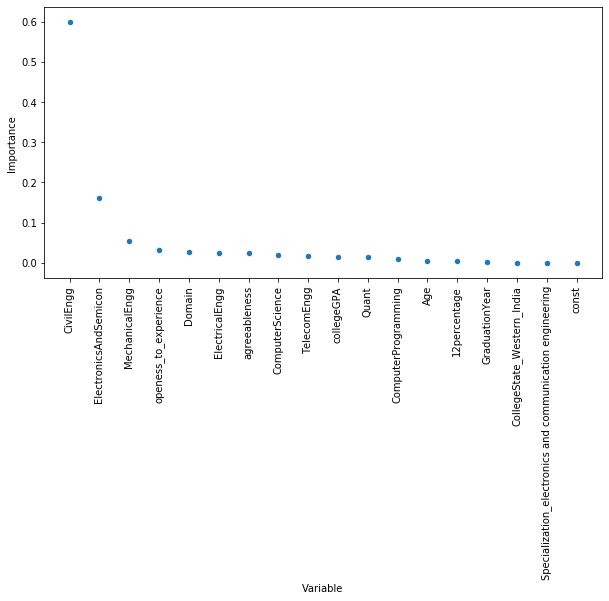

In [426]:
plt.rcParams['figure.figsize'] = [10,5] # Width, Height
varImpDf.plot(x = "Variable", y = "Importance", kind = "scatter", rot = 90);

### GRID SEARCH WITH CROSS VALIDATION for finding the best Hyperparameters 

In [427]:
from sklearn.model_selection import GridSearchCV

myParamGrid = {
    'n_estimators': [200, 250,300,350],
    'max_features': [7, 9, 11,13,15],
    'min_samples_leaf': [2, 3, 5, 10,12,20]
} 


gridSearchModels = GridSearchCV(
    estimator = RandomForestRegressor(random_state = 123, n_jobs = -1), # n_jobs = -1 for parallelization
    param_grid = myParamGrid,  # param_grid is a dictionary
    scoring = 'neg_mean_absolute_percentage_error', 
    cv=3).fit(X_train, Y_train) 

# Other scoring parameters are available here: http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
gridSearchModelsEvalDf = pd.DataFrame.from_dict(gridSearchModels.cv_results_)


In [428]:
gridSearchModelsEvalDf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.358473,1.273678,0.264041,0.211374,7,2,200,"{'max_features': 7, 'min_samples_leaf': 2, 'n_...",-0.088068,-0.088761,-0.103394,-0.093408,0.007067,68
1,0.462670,0.063565,0.110462,0.003917,7,2,250,"{'max_features': 7, 'min_samples_leaf': 2, 'n_...",-0.088278,-0.088334,-0.102351,-0.092988,0.006621,66
2,0.528938,0.049696,0.114290,0.003405,7,2,300,"{'max_features': 7, 'min_samples_leaf': 2, 'n_...",-0.087316,-0.088814,-0.102293,-0.092807,0.006735,65
3,0.596172,0.006946,0.111040,0.002304,7,2,350,"{'max_features': 7, 'min_samples_leaf': 2, 'n_...",-0.086829,-0.088699,-0.101974,-0.092501,0.006742,61
4,0.406014,0.062935,0.111807,0.002504,7,3,200,"{'max_features': 7, 'min_samples_leaf': 3, 'n_...",-0.092280,-0.091756,-0.109427,-0.097821,0.008209,74
5,0.394130,0.023812,0.200479,0.052824,7,3,250,"{'max_features': 7, 'min_samples_leaf': 3, 'n_...",-0.092434,-0.092578,-0.108975,-0.097996,0.007764,76
6,0.518810,0.040449,0.112980,0.007975,7,3,300,"{'max_features': 7, 'min_samples_leaf': 3, 'n_...",-0.091988,-0.092366,-0.108534,-0.097629,0.007712,73
7,0.569603,0.004185,0.110604,0.000377,7,3,350,"{'max_features': 7, 'min_samples_leaf': 3, 'n_...",-0.092092,-0.092257,-0.109127,-0.097825,0.007992,75
8,0.342279,0.023583,0.112983,0.002464,7,5,200,"{'max_features': 7, 'min_samples_leaf': 5, 'n_...",-0.105877,-0.104580,-0.122409,-0.110956,0.008116,84
9,0.359037,0.002032,0.116762,0.002049,7,5,250,"{'max_features': 7, 'min_samples_leaf': 5, 'n_...",-0.105337,-0.104016,-0.122054,-0.110469,0.008210,83


### Building the model based on the best hyperparameters provided by GridSearch

In [429]:
# Considering the parameters where rank_test_score is 1 from above dataframe

M3 = RandomForestRegressor(n_estimators = 200, max_features = 15, min_samples_leaf = 2, random_state = 123) 
M3 = M3.fit(X_train, Y_train) # Indep, Dep

### Model Evaluation

In [430]:
testPredDf = pd.DataFrame()
testPredDf["Prediction"] = M3.predict(X_test)
testPredDf["Actual"] = Y_test.values

print("RMSE:",np.sqrt(np.mean((testPredDf["Actual"] - testPredDf["Prediction"])**2)))
print("MAPE:",(np.mean(np.abs(((testPredDf["Actual"] - testPredDf["Prediction"])/testPredDf["Actual"]))))*100)

RMSE: 36030.17448662575
MAPE: 3.7498118425320914


**RMSE & MAPE has reduced even further when model built via the hyperparameters given by GridsearchCV**

# Boosting

## 1. Ada Boost

In [431]:
from sklearn.ensemble import AdaBoostRegressor

In [432]:
Ada_raw = AdaBoostRegressor(random_state =100).fit(X_train,Y_train)

In [433]:
testPredDf = pd.DataFrame()
testPredDf["Prediction"] = Ada_raw.predict(X_test)
testPredDf["Actual"] = Y_test.values
testPredDf.head()

,Prediction,Actual
0,245706.914345,180000.0
1,250601.851852,160000.0
2,500013.736264,660000.0
3,245706.914345,180000.0
4,245706.914345,145000.0


### Model Evaluation

In [434]:
print("RMSE:",np.sqrt(np.mean((testPredDf["Actual"] - testPredDf['Prediction'])**2)))

RMSE: 77844.18751626275


In [435]:
print("MAPE:",(np.mean(np.abs(((testPredDf["Actual"] - testPredDf["Prediction"])/testPredDf["Actual"]))))*100)

MAPE: 28.269287019674046


## 2.Gradient Boosting

In [436]:
from sklearn.ensemble import GradientBoostingRegressor

In [437]:
GD_raw = GradientBoostingRegressor(random_state =100).fit(X_train,Y_train)

In [438]:
testPredDf = pd.DataFrame()
testPredDf["Prediction"] = GD_raw.predict(X_test)
testPredDf["Actual"] = Y_test.values
testPredDf.head()

,Prediction,Actual
0,183199.138025,180000.0
1,189091.851756,160000.0
2,548496.293998,660000.0
3,164607.230922,180000.0
4,137074.567411,145000.0


### Model Evaluation

In [439]:
print("RMSE:",np.sqrt(np.mean((testPredDf["Actual"] - testPredDf['Prediction'])**2)))

RMSE: 60376.67220535691


In [440]:
print("MAPE:",(np.mean(np.abs(((testPredDf["Actual"] - testPredDf["Prediction"])/testPredDf["Actual"]))))*100)

MAPE: 12.11463045736442


## 3.XGBoost

In [441]:
from xgboost.sklearn import XGBRegressor

In [442]:
XG_raw = XGBRegressor(random_state =100).fit(X_train,Y_train)

In [443]:
testPredDf = pd.DataFrame()
testPredDf["Prediction"] = XG_raw.predict(X_test)
testPredDf["Actual"] = Y_test.values
testPredDf.head()

,Prediction,Actual
0,173901.90625,180000.0
1,158882.28125,160000.0
2,614545.37500,660000.0
3,161997.96875,180000.0
4,148907.06250,145000.0


### Model Evaluation

In [444]:
print("RMSE:",np.sqrt(np.mean((testPredDf["Actual"] - testPredDf['Prediction'])**2)))

RMSE: 42542.347751458685


In [445]:
print("MAPE:",(np.mean(np.abs(((testPredDf["Actual"] - testPredDf["Prediction"])/testPredDf["Actual"]))))*100)

MAPE: 4.767503772984137


### Conclusion: 
**Based on the Evaluation of all the models built using different Regression algorithms<br>
"Random Forest" provides the best model with least error. i.e, RMSE & MAPE**